# 100 Bài Tập Xử Lý Dữ Liệu Có Cấu Trúc Với Pandas

## Cài đặt và tải dữ liệu

In [3]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

dtype = {
    'customer_id': str,
    'gender_cd': str,
    'postal_cd': str,
    'application_store_cd': str,
    'status_cd': str,
    'category_major_cd': str,
    'category_medium_cd': str,
    'category_small_cd': str,
    'product_cd': str,
    'store_cd': str,
    'prefecture_cd': str,
    'tel_no': str,
    'postal_cd': str,
    'street': str
}

df_customer = pd.read_csv("../../data/preprocessed/customer_eng.csv", dtype=dtype)
df_category = pd.read_csv("../../data/preprocessed/category_eng.csv", dtype=dtype)
df_product = pd.read_csv("../../data/preprocessed/product.csv", dtype=dtype)
df_receipt = pd.read_csv("../../data/preprocessed/receipt.csv", dtype=dtype)
df_store = pd.read_csv("../../data/preprocessed/store_eng.csv", dtype=dtype)
df_geocode = pd.read_csv("../../data/preprocessed/geocode_eng.csv", dtype=dtype)

In [4]:
print(pd.__version__)

2.2.3


## Bài Tập

### Phần 1: 1 - 20

---
> P-001: Từ dữ liệu biên nhận (df_receipt), hiển thị 10 bản ghi đầu tiên và kiểm tra xem loại dữ liệu nào được lưu trữ trong các cột.

In [57]:
df_receipt.head(10)

,sales_date,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount
0,20181103,1541203200,S14006,112,1,CS006214000001,P070305012,1,158
1,20181118,1542499200,S13008,1132,2,CS008415000097,P070701017,1,81
2,20170712,1499817600,S14028,1102,1,CS028414000014,P060101005,1,170
3,20190205,1549324800,S14042,1132,1,ZZ000000000000,P050301001,1,25
4,20180821,1534809600,S14025,1102,2,CS025415000050,P060102007,1,90
5,20190605,1559692800,S13003,1112,1,CS003515000195,P050102002,1,138
6,20181205,1543968000,S14024,1102,2,CS024514000042,P080101005,1,30
7,20190922,1569110400,S14040,1102,1,CS040415000178,P070501004,1,128
8,20170504,1493856000,S13020,1112,2,ZZ000000000000,P071302010,1,770
9,20191010,1570665600,S14027,1102,1,CS027514000015,P071101003,1,680


In [65]:
df_receipt.dtypes

sales_date         int64
sales_epoch        int64
store_cd          object
receipt_no         int64
receipt_sub_no     int64
customer_id       object
product_cd        object
quantity           int64
amount             int64
dtype: object

---
> P-002:
Từ dữ liệu biên nhận (df_receipt), chỉ định các cột theo thứ tự sau và hiển thị 10 bản ghi: ngày bán hàng (sales_ymd), ID khách hàng (customer_id), mã sản phẩm (product_cd), số tiền bán hàng (amount).

In [62]:
df_receipt[["sales_date","customer_id","product_cd","amount"]].head(10)

,sales_date,customer_id,product_cd,amount
0,20181103,CS006214000001,P070305012,158
1,20181118,CS008415000097,P070701017,81
2,20170712,CS028414000014,P060101005,170
3,20190205,ZZ000000000000,P050301001,25
4,20180821,CS025415000050,P060102007,90
5,20190605,CS003515000195,P050102002,138
6,20181205,CS024514000042,P080101005,30
7,20190922,CS040415000178,P070501004,128
8,20170504,ZZ000000000000,P071302010,770
9,20191010,CS027514000015,P071101003,680


In [66]:
df_receipt.rename(columns={"sales_date": "sales_ymd"}, inplace=True)

In [67]:
df_receipt.head(10)

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount
0,20181103,1541203200,S14006,112,1,CS006214000001,P070305012,1,158
1,20181118,1542499200,S13008,1132,2,CS008415000097,P070701017,1,81
2,20170712,1499817600,S14028,1102,1,CS028414000014,P060101005,1,170
3,20190205,1549324800,S14042,1132,1,ZZ000000000000,P050301001,1,25
4,20180821,1534809600,S14025,1102,2,CS025415000050,P060102007,1,90
5,20190605,1559692800,S13003,1112,1,CS003515000195,P050102002,1,138
6,20181205,1543968000,S14024,1102,2,CS024514000042,P080101005,1,30
7,20190922,1569110400,S14040,1102,1,CS040415000178,P070501004,1,128
8,20170504,1493856000,S13020,1112,2,ZZ000000000000,P071302010,1,770
9,20191010,1570665600,S14027,1102,1,CS027514000015,P071101003,1,680


---
> P-003:
Từ dữ liệu biên nhận (df_receipt), chỉ định các cột theo thứ tự sau và hiển thị 10 bản ghi: ngày bán hàng (sales_ymd), ID khách hàng (customer_id), mã sản phẩm (product_cd), số tiền bán hàng (amount). Tuy nhiên, đổi tên cột sales_ymd thành sales_date trước khi hiển thị.

In [68]:
print(df_receipt.columns)  # Check if "sales_date" is now in the columns

Index(['sales_ymd', 'sales_epoch', 'store_cd', 'receipt_no', 'receipt_sub_no',
       'customer_id', 'product_cd', 'quantity', 'amount'],
      dtype='object')


In [72]:
df_receipt[["sales_ymd","customer_id","product_cd","amount"]].rename(columns= {"sales_ymd": "sales_date"}).head(10)

,sales_date,customer_id,product_cd,amount
0,20181103,CS006214000001,P070305012,158
1,20181118,CS008415000097,P070701017,81
2,20170712,CS028414000014,P060101005,170
3,20190205,ZZ000000000000,P050301001,25
4,20180821,CS025415000050,P060102007,90
5,20190605,CS003515000195,P050102002,138
6,20181205,CS024514000042,P080101005,30
7,20190922,CS040415000178,P070501004,128
8,20170504,ZZ000000000000,P071302010,770
9,20191010,CS027514000015,P071101003,680


---
> P-004:
Từ dữ liệu biên nhận (df_receipt), chỉ định các cột theo thứ tự sau và trích xuất dữ liệu đáp ứng các điều kiện dưới đây: ngày bán hàng (sales_ymd), ID khách hàng (customer_id), mã sản phẩm (product_cd), số tiền bán hàng (amount).
> - ID khách hàng (customer_id) là "CS018205000001"

In [73]:
print(df_receipt.columns)

Index(['sales_ymd', 'sales_epoch', 'store_cd', 'receipt_no', 'receipt_sub_no',
       'customer_id', 'product_cd', 'quantity', 'amount'],
      dtype='object')


In [77]:
#chain method
(
df_receipt[["sales_ymd","customer_id","product_cd","amount"]]
    .query("customer_id=='CS018205000001'")
)

,sales_ymd,customer_id,product_cd,amount
36,20180911,CS018205000001,P071401012,2200
9843,20180414,CS018205000001,P060104007,600
21110,20170614,CS018205000001,P050206001,990
27673,20170614,CS018205000001,P060702015,108
27840,20190216,CS018205000001,P071005024,102
28757,20180414,CS018205000001,P071101002,278
39256,20190226,CS018205000001,P070902035,168
58121,20190924,CS018205000001,P060805001,495
68117,20190226,CS018205000001,P071401020,2200
72254,20180911,CS018205000001,P071401005,1100


---
> P-005:
Từ dữ liệu biên nhận (df_receipt), chỉ định các cột theo thứ tự sau và trích xuất dữ liệu đáp ứng tất cả các điều kiện dưới đây: ngày bán hàng (sales_ymd), ID khách hàng (customer_id), mã sản phẩm (product_cd), số tiền bán hàng (amount).
> - ID khách hàng (customer_id) là "CS018205000001"
> - Số tiền bán hàng (amount) lớn hơn hoặc bằng 1000

In [184]:
(
df_receipt[["sales_ymd","customer_id","product_cd","amount"]]
    .query("(customer_id=='CS018205000001') & (amount >=1000)")
    .head(10)
)

,sales_ymd,customer_id,product_cd,amount
36,20180911,CS018205000001,P071401012,2200
68117,20190226,CS018205000001,P071401020,2200
72254,20180911,CS018205000001,P071401005,1100


---
> P-006:
Từ dữ liệu biên nhận (df_receipt), chỉ định các cột theo thứ tự sau và trích xuất dữ liệu đáp ứng tất cả các điều kiện dưới đây: ngày bán hàng (sales_ymd), ID khách hàng (customer_id), mã sản phẩm (product_cd), số lượng bán hàng (quantity), số tiền bán hàng (amount).
> - ID khách hàng (customer_id) là "CS018205000001"
> - Số tiền bán hàng (amount) lớn hơn hoặc bằng 1000 hoặc số lượng bán hàng (quantity) lớn hơn hoặc bằng 5

In [186]:
(
df_receipt[["sales_ymd","customer_id","product_cd", "quantity", "amount"]]
    .query("(customer_id=='CS018205000001') & (amount >=1000 | quantity >=5)")
    .head(10)
)

,sales_ymd,customer_id,product_cd,quantity,amount
36,20180911,CS018205000001,P071401012,1,2200
9843,20180414,CS018205000001,P060104007,6,600
21110,20170614,CS018205000001,P050206001,5,990
68117,20190226,CS018205000001,P071401020,1,2200
72254,20180911,CS018205000001,P071401005,1,1100


---
> P-007:
Từ dữ liệu biên nhận (df_receipt), chỉ định các cột theo thứ tự sau và trích xuất dữ liệu đáp ứng tất cả các điều kiện dưới đây: ngày bán hàng (sales_ymd), ID khách hàng (customer_id), mã sản phẩm (product_cd), số tiền bán hàng (amount).
> - ID khách hàng (customer_id) là "CS018205000001"
> - Số tiền bán hàng (amount) lớn hơn hoặc bằng 1000 và nhỏ hơn hoặc bằng 2000

In [188]:
(
df_receipt[["sales_ymd","customer_id","product_cd","amount"]]
    .query("(customer_id=='CS018205000001') & (amount >=1000 & amount <=2000) ")
)

,sales_ymd,customer_id,product_cd,amount
72254,20180911,CS018205000001,P071401005,1100


---
> P-008:
Từ dữ liệu biên nhận (df_receipt), chỉ định các cột theo thứ tự sau và trích xuất dữ liệu đáp ứng tất cả các điều kiện dưới đây: ngày bán hàng (sales_ymd), ID khách hàng (customer_id), mã sản phẩm (product_cd), số tiền bán hàng (amount).
> - ID khách hàng (customer_id) là "CS018205000001"
> - Mã sản phẩm (product_cd) không phải là "P071401019"

In [93]:
(
df_receipt[["sales_ymd","customer_id","product_cd","amount"]]
    .query("customer_id=='CS018205000001' & product_cd != 'P071401019'")
)

,sales_ymd,customer_id,product_cd,amount
36,20180911,CS018205000001,P071401012,2200
9843,20180414,CS018205000001,P060104007,600
21110,20170614,CS018205000001,P050206001,990
27673,20170614,CS018205000001,P060702015,108
27840,20190216,CS018205000001,P071005024,102
28757,20180414,CS018205000001,P071101002,278
39256,20190226,CS018205000001,P070902035,168
58121,20190924,CS018205000001,P060805001,495
68117,20190226,CS018205000001,P071401020,2200
72254,20180911,CS018205000001,P071401005,1100


---
> P-009: Thay đổi điều kiện lọc dưới đây và thay thế từ khóa OR thành AND trong truy vấn xuất dữ liệu.
> 
> `df_store.query('not(prefecture_cd == "13" | floor_area > 900)')`

In [94]:
df_store.query('prefecture_cd != "13" & floor_area <= 900')

,store_cd,store_name,prefecture_cd,prefecture,address,tel_no,longitude,latitude,floor_area
18,S14046,Kitayamada store,14,Kanagawa Prefecture,"Kitamada 1-chome, Tsuzuki-ku, Yokohama-shi, Ka...",045-123-4049,139.5916,35.56189,831.0
20,S14011,Hiyoshi Honmachi store,14,Kanagawa Prefecture,"4-chome Honcho, Kohoku-ku, Yokohama-shi, Kanagawa",045-123-4033,139.6316,35.54655,890.0
38,S12013,Narashino store,12,Chiba prefecture,"1-chome Shibaen, Narashino City, Chiba Prefecture",047-123-4002,140.0220,35.66122,808.0


---
> P-010:
Từ dữ liệu cửa hàng (df_store), trích xuất và hiển thị 10 bản ghi với mã cửa hàng (store_cd) bắt đầu bằng 'S14'.

In [189]:
#df_store[df_store["store_cd"].str.startswith('S14')].head(10)
df_store.query("store_cd.str.startswith('S14')").head(10)

,store_cd,store_name,prefecture_cd,prefecture,address,tel_no,longitude,latitude,floor_area
2,S14010,Kikuna store,14,Kanagawa Prefecture,"Kikuna 1-chome, Kohoku-ku, Yokohama-shi, Kanagawa",045-123-4032,139.6326,35.50049,1732.0
3,S14033,Akuwa store,14,Kanagawa Prefecture,"Akuwa Nishi 1-chome, Seya-ku, Yokohama-shi, Ka...",045-123-4043,139.4961,35.45918,1495.0
4,S14036,Sagamihara Central Store,14,Kanagawa Prefecture,"2-chome, Chuo, Sagamihara City, Kanagawa Prefe...",042-123-4045,139.3716,35.57327,1679.0
7,S14040,Nagatsuta store,14,Kanagawa Prefecture,"Nagatsuda Minamidai 5-chome, Midori-ku, Yokoha...",045-123-4046,139.4994,35.52398,1548.0
9,S14050,Akuwa Nishi store,14,Kanagawa Prefecture,"Akuwa Nishi 1-chome, Seya-ku, Yokohama-shi, Ka...",045-123-4053,139.4961,35.45918,1830.0
12,S14028,Futatsu Bridge store,14,Kanagawa Prefecture,"Futatsuhashi-cho, Seya-ku, Yokohama-shi, Kanagawa",045-123-4042,139.4963,35.46304,1574.0
16,S14012,Honmaki Wada store,14,Kanagawa Prefecture,"Honmaki Wada, Naka-ku, Yokohama-shi, Kanagawa",045-123-4034,139.6582,35.42156,1341.0
18,S14046,Kitayamada store,14,Kanagawa Prefecture,"Kitamada 1-chome, Tsuzuki-ku, Yokohama-shi, Ka...",045-123-4049,139.5916,35.56189,831.0
19,S14022,Zushi store,14,Kanagawa Prefecture,"Zushi 1-chome, Zushi City, Kanagawa Prefecture",046-123-4036,139.5789,35.29642,1838.0
20,S14011,Hiyoshi Honmachi store,14,Kanagawa Prefecture,"4-chome Honcho, Kohoku-ku, Yokohama-shi, Kanagawa",045-123-4033,139.6316,35.54655,890.0


---
> P-011:
Từ dữ liệu khách hàng (df_customer), trích xuất và hiển thị 10 bản ghi với mã ID khách hàng (customer_id) kết thúc bằng '1'.

In [191]:
#df_customer[df_customer["customer_id"].str.endswith('1')].head(10)
df_customer.query("customer_id.str.endswith('1')").head(10)

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
4,CS033515000071,Yuki Suwa,1,Male,1966-04-30,52,246-0031,"Seya -ku, Yokohama -shi, Kanagawa",S14033,20151129,D-20100930-D
7,CS022515000271,Riho Nakagawa,1,Male,1966-08-27,52,249-0005,"Sakurayama, Zushi City, Kanagawa Prefecture",S14022,20181010,0-00000000-0
10,CS015212000021,Fujimura 7th,1,Male,1997-03-20,22,136-0071,"Kameido, Koto -ku, Tokyo",S13015,20150812,0-00000000-0
17,CS007502000011,Koji Asakura,0,Female,1962-07-28,56,285-0854,"Kamiza, Sakura City, Chiba Prefecture",S12007,20150328,0-00000000-0
20,CS004415000861,Ryoko Omori,1,Male,1974-01-28,45,165-0032,"Saginomiya, Nakano -ku, Tokyo",S13004,20170525,0-00000000-0
36,CS007702000011,History of Takeshi Nagai,0,Female,1941-04-22,77,285-0866,"Usuidai, Sakura City, Chiba Prefecture",S12007,20150609,0-00000000-0
37,CS029503000041,Nakahara Subaru,0,Female,1966-02-13,53,134-0084,"Higashi Kasai, Edogawa -ku, Tokyo",S12029,20150222,0-00000000-0
60,CS005713000021,Ruria Noda,1,Male,1943-10-03,75,167-0022,"Suginami -ku, Tokyo Shimoigusa",S13005,20150317,0-00000000-0
76,CS004603000051,Taro Matsutani,0,Female,1952-12-11,66,165-0032,"Saginomiya, Nakano -ku, Tokyo",S13004,20161014,0-00000000-0
77,CS003314000081,Takakura sandbags,1,Male,1984-06-27,34,201-0012,"Komae -shi, Tokyo Ikuwaki",S13003,20150324,6-20100917-7


---
> P-012:
Từ dữ liệu cửa hàng (df_store), trích xuất và hiển thị 10 bản ghi với địa chỉ (address) có chứa từ 'Tokyo'.

In [192]:
#df_store[df_store["address"].str.contains('Tokyo')].head(10)
df_store.query("address.str.contains('Tokyo')").head(10)

,store_cd,store_name,prefecture_cd,prefecture,address,tel_no,longitude,latitude,floor_area
1,S13002,Kokubunji Temple,13,Tokyo,"Honda 2-chome, Kokubunji City, Tokyo",042-123-4008,139.4802,35.70566,1735.0
5,S13051,Itabashi Ohara store,13,Tokyo,"Ohara-cho, Itabashi-ku, Tokyo",03-0123-4029,139.6980,35.76788,1045.0
6,S13015,Southern sand store,13,Tokyo,"2-chome, Koto-ku, Tokyo 2-chome",03-0123-4014,139.8229,35.67066,1337.0
8,S13044,Minami -Rokugo store,13,Tokyo,"Minami Rokugo 2-chome, Ota-ku, Tokyo",03-0123-4028,139.7207,35.54604,1379.0
10,S13019,Komorone store,13,Tokyo,"Komorine 1-chome, Itabashi-ku, Tokyo",03-0123-4018,139.6795,35.74468,1004.0
11,S13052,Morino store,13,Tokyo,"Morino Sanchome, Machida City, Tokyo",042-123-4030,139.4383,35.55293,1087.0
13,S13031,Hatsudai store,13,Tokyo,"Hatsudai 2-chome, Shibuya-ku, Tokyo",03-0123-4020,139.6862,35.67616,986.0
14,S13038,Higashikasai store,13,Tokyo,"Tokyo Kasai 9-chome, Edogawa-ku, Tokyo",03-0123-4024,139.8826,35.65366,1184.0
15,S13001,Naka -Rokugo store,13,Tokyo,"2-chome, Nakarokugo, Ota-ku, Tokyo",03-1234-4007,139.7132,35.55135,1796.0
17,S13004,Sagimiya store,13,Tokyo,"Saginomiya Sanchome, Nakano-ku, Tokyo",03-0123-4010,139.6421,35.72348,947.0


---
> P-013:
Từ dữ liệu khách hàng (df_customer), trích xuất và hiển thị 10 bản ghi với mã trạng thái (status_cd) bắt đầu bằng chữ cái từ 'A' đến 'F'.

In [206]:
#df_customer[df_customer["status_cd"].str.startswith(tuple('ABCDEF'))].head(10)
#df_customer[["customer_id","customer_name","address","status_cd"]][df_customer["status_cd"].str.contains(r'^[A-F]')].head(10)
(
    df_customer[["customer_id","customer_name","address","status_cd"]]
    .query("status_cd.str.contains(r'^[A-F]')")
    .head(10)
)

,customer_id,customer_name,address,status_cd
0,CS019415000154,Yuki Umemura,"Hikawadai, Nerima -ku, Tokyo",E-20101014-E
4,CS033515000071,Yuki Suwa,"Seya -ku, Yokohama -shi, Kanagawa",D-20100930-D
16,CS024415000146,Sachiko Hosaka,"Ikuta, Tama -ku, Kawasaki City, Kanagawa Prefe...",D-20101026-F
45,CS019415000084,Honzan Mami,"Hazawa, Nerima -ku, Tokyo",C-20101012-E
53,CS019214000008,Reina Okuno,"Chihaya, Toshima -ku, Tokyo",D-20100714-A
54,CS002515000256,Yoko Kikuchi,"Kokubunji -shi, Tokyo Nishiki Kokubo",A-20100303-7
63,CS017315000023,Reina Uchino,"Narita Higashi, Suginami -ku, Tokyo",C-20090424-5
70,CS030415000034,Tamaki Nanko,"Owada, Ichikawa City, Chiba Prefecture",F-20101020-F
72,CS025214000016,Furukawa Erika,"Kamiiida -cho, Izumi -ku, Yokohama -shi, Kanagawa",D-20101029-F
101,CS021115000004,Hikaru Kurata,"Nishi -Tomioka, Isehara City, Kanagawa Prefecture",E-20100925-E


---
> P-014:
Từ dữ liệu khách hàng (df_customer), trích xuất và hiển thị 10 bản ghi với mã trạng thái (status_cd) kết thúc bằng các số từ '1' đến '9'.

In [207]:
(
    df_customer[["customer_id","customer_name","address","status_cd"]]
    .query("status_cd.str.contains(r'[1-9]$')")
    .head(10)
)

,customer_id,customer_name,address,status_cd
1,CS008514000047,Nozomi Ishikawa,"Iwato Kita, Komae City, Tokyo",6-20100613-8
3,CS004615000296,Yu Tateishi,"Nakano -ku, Tokyo Nomo",4-20080701-1
8,CS020412000046,An apricot of Kurosaki,"Shimura, Itabashi -ku, Tokyo",1-20100516-3
11,CS031514000047,Reiko Haraguchi,"Uehara, Shibuya -ku, Tokyo",8-20090607-6
12,CS017513000183,Kyoko Suenaga,"Nakano -ku, Tokyo Nomo",1-20090203-3
15,CS044415000024,Chikako Sugino,"Kamata, Ota -ku, Tokyo",6-20101016-9
24,CS025512000055,Mayuko Mizuguchi,"Fukuda, Yamato City, Kanagawa Prefecture",4-20090705-4
34,CS011315000042,Aya Inagaki,"Hiyoshi, Kohoku -ku, Yokohama -shi, Kanagawa",1-20080219-3
41,CS001315000186,Mikako Tomita,"Nakarokugo, Ota -ku, Tokyo",3-20080412-1
49,CS026615000130,Rie Matsunaga,"Tsujido Motomachi, Fujisawa City, Kanagawa Pre...",8-20090727-5


---
> P-015:
Từ dữ liệu khách hàng (df_customer), trích xuất và hiển thị 10 bản ghi với mã trạng thái (status_cd) bắt đầu bằng chữ cái từ 'A' đến 'F' và kết thúc bằng các số từ '1' đến '9'.

In [214]:
#df_customer1[df_customer1["status_cd"].str.endswith(tuple('123456789'))].head(10)
#df_customer1[df_customer1["status_cd"].str.startswith(tuple('ABCDEF')) & df_customer1["status_cd"].str.endswith(tuple('123456789'))].head(10)
(
    df_customer[["customer_id","customer_name","address","status_cd"]]
    .query("status_cd.str.contains(r'^[A-F].*[1-9]$')")
    .head(10)
)

,customer_id,customer_name,address,status_cd
54,CS002515000256,Yoko Kikuchi,"Kokubunji -shi, Tokyo Nishiki Kokubo",A-20100303-7
63,CS017315000023,Reina Uchino,"Narita Higashi, Suginami -ku, Tokyo",C-20090424-5
163,CS022415000100,Misako Sunagawa,"Shinjuku, Zushi City, Kanagawa Prefecture",B-20091009-9
167,CS038314000035,Kyoko Okunuki,"Higashi Kasai, Edogawa -ku, Tokyo",A-20100917-9
239,CS025512000143,Yoshino Kikuchi,"Shibuya, Yamato City, Kanagawa Prefecture",B-20090802-5
282,CS010513000187,Asami Matsukawa,"Samido -cho, Kohoku -ku, Yokohama -shi, Kanagawa",D-20100808-2
319,CS020212000014,Matsui Natsuzora,"Kawaguchi, Kawaguchi City, Saitama Prefecture",E-20100524-7
432,CS019215000029,Mayuko Sawa,"Sakuradai, Nerima -ku, Tokyo",A-20100622-9
520,CS015414000138,Erika Kusano,"Minami sand in Koto -ku, Tokyo",D-20100504-9
524,CS035615000040,Daigoro Kawanishi,"Kamimariga, Setagaya -ku, Tokyo",E-20100830-6


---
> P-016:
Từ dữ liệu cửa hàng (df_store), trích xuất và hiển thị 10 bản ghi với số điện thoại (tel_no) tuân theo qui tắc xxx-xxx-xxxx. Trong đó x là 1 số tự nhiên từ 0-9.

In [218]:
#df_store["tel_no"].head(10)
# Trích xuất các bản ghi có tel_no tuân theo định dạng xxx-xxx-xxxx
#df_filtered = df_store[df_store["tel_no"].str.match(r'^\d{3}-\d{3}-\d{4}$')]
# Hiển thị 10 bản ghi đầu tiên
#df_filtered[["store_cd","store_name","tel_no"]].head(10)

df_store.query("tel_no.str.contains(r'^\d{3}-\d{3}-\d{4}$')").head(10)

,store_cd,store_name,prefecture_cd,prefecture,address,tel_no,longitude,latitude,floor_area
0,S12014,Chigakadai store,12,Chiba prefecture,"1-chome, Chigusadai, Inage-ku, Chiba-shi, Chiba",043-123-4003,140.1180,35.63559,1698.0
1,S13002,Kokubunji Temple,13,Tokyo,"Honda 2-chome, Kokubunji City, Tokyo",042-123-4008,139.4802,35.70566,1735.0
2,S14010,Kikuna store,14,Kanagawa Prefecture,"Kikuna 1-chome, Kohoku-ku, Yokohama-shi, Kanagawa",045-123-4032,139.6326,35.50049,1732.0
3,S14033,Akuwa store,14,Kanagawa Prefecture,"Akuwa Nishi 1-chome, Seya-ku, Yokohama-shi, Ka...",045-123-4043,139.4961,35.45918,1495.0
4,S14036,Sagamihara Central Store,14,Kanagawa Prefecture,"2-chome, Chuo, Sagamihara City, Kanagawa Prefe...",042-123-4045,139.3716,35.57327,1679.0
7,S14040,Nagatsuta store,14,Kanagawa Prefecture,"Nagatsuda Minamidai 5-chome, Midori-ku, Yokoha...",045-123-4046,139.4994,35.52398,1548.0
9,S14050,Akuwa Nishi store,14,Kanagawa Prefecture,"Akuwa Nishi 1-chome, Seya-ku, Yokohama-shi, Ka...",045-123-4053,139.4961,35.45918,1830.0
11,S13052,Morino store,13,Tokyo,"Morino Sanchome, Machida City, Tokyo",042-123-4030,139.4383,35.55293,1087.0
12,S14028,Futatsu Bridge store,14,Kanagawa Prefecture,"Futatsuhashi-cho, Seya-ku, Yokohama-shi, Kanagawa",045-123-4042,139.4963,35.46304,1574.0
16,S14012,Honmaki Wada store,14,Kanagawa Prefecture,"Honmaki Wada, Naka-ku, Yokohama-shi, Kanagawa",045-123-4034,139.6582,35.42156,1341.0


---
> P-017:
Từ dữ liệu khách hàng (df_customer), sắp xếp và hiển thị 10 bản ghi đầu tiên theo thứ tự tăng dần của ngày sinh (birth_day).

In [156]:
#df_sorted= df_customer.sort_values(by="birth_day", ascending=True)
#df_sorted.head(10)
(
df_customer[["customer_id", "customer_name", "birth_day"]]
    .sort_values(by="birth_day", ascending=True)
    .head(10)
)

,customer_id,customer_name,birth_day
401,CS017811000003,Yuu Kageyama,1930-02-27
258,CS030802000009,Shingo Shogo,1930-08-31
927,CS038813000006,Miyuki Toshima,1931-01-07
640,CS005812000025,Ryo Nagase,1931-10-06
200,CS024815000023,Mayuko Takenaka,1931-11-25
812,CS034813000001,Yuko Yasuko,1932-03-03
133,CS039813000020,Toshima light,1932-03-29
129,CS002815000035,Ema Kawano,1932-04-17
399,CS032815000020,Natsuki Doi,1932-06-14
128,CS007813000023,Airi Mizoguchi,1932-06-28


---
> P-018:
Từ dữ liệu khách hàng (df_customer), sắp xếp và hiển thị 10 bản ghi đầu tiên theo thứ tự giảm dần của ngày sinh (birth_day).

In [158]:
(
df_customer[["customer_id", "customer_name", "birth_day"]]
    .sort_values(by="birth_day", ascending=False)
    .head(10)
)

,customer_id,customer_name,birth_day
134,CS004112000011,Miyu Tamaki,2007-01-03
516,CS021102000003,Nakahara,2006-05-17
560,CS032115000007,Tomono Noguchi,2006-04-11
44,CS019114000002,Mami Morii,2004-12-17
703,CS037112000007,Sayaka Temple,2004-01-20
250,CS032115000006,Koizumi High History,2003-11-14
101,CS021115000004,Hikaru Kurata,2003-01-19
512,CS030112000001,Haruki Yamauchi,2002-01-26
867,CS011412000021,Riho Tamada,1999-10-21
938,CS028213000058,Mayuko Terashima,1997-12-17


---
> P-019:
Từ dữ liệu biên nhận (df_receipt), xếp hạng số tiền bán hàng (amount) theo thứ tự giảm dần và hiển thị 10 bản ghi đầu tiên. Đính kèm các cột ID khách hàng (customer_id) và số tiền bán hàng (amount) với hạng tương ứng. Nếu số tiền bán hàng (amount) bằng nhau, hạng sẽ giống nhau.

In [220]:
(
df_receipt[["customer_id", "amount"]]
    .assign(ranking=df_receipt["amount"].rank(method="min", ascending=False).astype(int))
    #.assign(rank=df_receipt["amount"].rank(method="first", ascending=False).astype(int))
    #.sort_values(by="amount", ascending=False)
    .sort_values("ranking")
    .head(10)
)

,customer_id,amount,ranking
1202,CS011415000006,10925,1
62317,ZZ000000000000,6800,2
54095,CS028605000002,5780,3
72747,ZZ000000000000,5480,4
10320,ZZ000000000000,5480,4
4632,CS015515000034,5480,4
97294,CS021515000089,5440,7
28304,ZZ000000000000,5440,7
11275,CS017414000114,5280,9
55795,CS032414000072,5280,9


---
> P-020:
Từ dữ liệu biên nhận (df_receipt), xếp hạng số tiền bán hàng (amount) theo thứ tự tăng dần và hiển thị 10 bản ghi đầu tiên. Đính kèm các cột ID khách hàng (customer_id) và số tiền bán hàng (amount) với hạng tương ứng. Trong trường hợp số tiền bán hàng (amount) bằng nhau hạng sẽ không được |giống nhau.

In [223]:
(
df_receipt[["customer_id", "amount"]]
    .assign(ranking=df_receipt["amount"].rank(method="first", ascending=False).astype(int))
    .sort_values("ranking")
    .head(10)
)

,customer_id,amount,ranking
1202,CS011415000006,10925,1
62317,ZZ000000000000,6800,2
54095,CS028605000002,5780,3
4632,CS015515000034,5480,4
10320,ZZ000000000000,5480,5
72747,ZZ000000000000,5480,6
28304,ZZ000000000000,5440,7
97294,CS021515000089,5440,8
596,CS015515000083,5280,9
11275,CS017414000114,5280,10


### Phần 2: 21 - 40

---
> P-021:
Từ dữ liệu biên nhận (df_receipt), đếm số lượng bản ghi.

In [286]:
%reset -f

In [290]:
#df_receipt.count()
len(df_receipt)

104681

In [268]:
df_receipt.shape

(104681, 9)

---
> P-022:
Từ dữ liệu biên nhận (df_receipt), đếm số lượng các giá trị duy nhất của ID khách hàng (customer_id).

In [270]:
len(df_receipt["customer_id"].unique())


8307

In [271]:
df_receipt["customer_id"].nunique()

8307

---
> P-023:
Từ dữ liệu biên nhận (df_receipt), tính tổng số tiền bán hàng (amount) và số lượng bán hàng (quantity) cho mỗi cửa hàng (store_cd).

In [273]:
#df_receipt.head()
df_store_sales = df_receipt.groupby("store_cd").agg(
    total_amount=("amount", "sum"),
    total_quantity=("quantity", "sum")
).reset_index()

# Hiển thị kết quả
display(df_store_sales)

,store_cd,total_amount,total_quantity
0,S12007,638761,2099
1,S12013,787513,2425
2,S12014,725167,2358
3,S12029,794741,2555
4,S12030,684402,2403
5,S13001,811936,2347
6,S13002,727821,2340
7,S13003,764294,2197
8,S13004,779373,2390
9,S13005,629876,2004


In [277]:
(
    df_receipt.groupby("store_cd")
    .agg(
        {
            "amount": "sum",
            "quantity": "sum"
        }
    ) #aggregation
    .reset_index()
    .sort_values(by='quantity',ascending=False) # ham sap xep theo thu tu giam dan
    .head(10)
)

,store_cd,amount,quantity
15,S13018,790535,2562
3,S12029,794741,2555
16,S13019,827833,2541
38,S14026,824537,2503
19,S13032,790501,2491
10,S13008,809288,2491
11,S13009,808870,2486
40,S14028,786145,2458
31,S14011,805724,2434
13,S13016,793773,2432


---
> P-024:
Từ dữ liệu biên nhận (df_receipt), hiển thị 10 bản ghi có ngày bán hàng (sales_ymd) mới nhất cho mỗi ID khách hàng (customer_id).

In [284]:
# Sắp xếp theo customer_id và sales_ymd giảm dần
df_sorted = df_receipt.sort_values(by=["customer_id", "sales_ymd"], ascending=[True, False])
#print(df_sorted.head(10))

# Lấy 10 bản ghi mới nhất cho mỗi customer_id
df_latest_sales = df_sorted.groupby("customer_id").head().reset_index()
#df_latest_sales.head(10)
# Hiển thị kết quả
#print(df_latest_sales)

In [278]:
df_receipt.groupby("customer_id").agg({"sales_ymd":"max"}).reset_index().head(10)

,customer_id,sales_ymd
0,CS001113000004,20190308
1,CS001114000005,20190731
2,CS001115000010,20190405
3,CS001205000004,20190625
4,CS001205000006,20190224
5,CS001211000025,20190322
6,CS001212000027,20170127
7,CS001212000031,20180906
8,CS001212000046,20170811
9,CS001212000070,20191018


---
> P-025:
Từ dữ liệu biên nhận (df_receipt), hiển thị 10 bản ghi có ngày bán hàng (sales_ymd) cũ nhất cho mỗi ID khách hàng (customer_id).

In [291]:
df_receipt.groupby("customer_id").agg({"sales_ymd":"min"}).reset_index().head(10)

,customer_id,sales_ymd
0,CS001113000004,20190308
1,CS001114000005,20180503
2,CS001115000010,20171228
3,CS001205000004,20170914
4,CS001205000006,20180207
5,CS001211000025,20190322
6,CS001212000027,20170127
7,CS001212000031,20180906
8,CS001212000046,20170811
9,CS001212000070,20191018


---
> P-026:
Từ dữ liệu biên nhận (df_receipt), hiển thị 10 bản ghi có ngày bán hàng (sales_ymd) mới nhất và cũ nhất cho mỗi ID khách hàng (customer_id). Nếu ngày bán hàng khác nhau, hiển thị 10 bản ghi.

In [370]:
# Sắp xếp dữ liệu theo customer_id và sales_ymd
df_sorted = df_receipt[["customer_id","sales_ymd"]].sort_values(by=["customer_id", "sales_ymd"], ascending=[True, True])

# Lấy ngày bán hàng cũ nhất và mới nhất cho mỗi customer_id
df_newest = df_sorted.groupby("customer_id").tail(1)  # Ngày mới nhất
df_newest.rename(columns={"sales_ymd": "sales_newest"}, inplace=True)

df_oldest = df_sorted.groupby("customer_id").head(1)  # Ngày cũ nhất
df_oldest.rename(columns={"sales_ymd": "sales_oldest"},inplace=True)

# Kết hợp hai DataFrames lại
#df_combined = pd.concat([df_newest, df_oldest]).drop_duplicates().reset_index(drop=True)

df_combined = pd.merge(df_newest, df_oldest, on="customer_id", how="inner")
# Hiển thị 10 bản ghi
df_combined.query("sales_newest != sales_oldest").head(10)


,customer_id,sales_newest,sales_oldest
1,CS001114000005,20190731,20180503
2,CS001115000010,20190405,20171228
3,CS001205000004,20190625,20170914
4,CS001205000006,20190224,20180207
13,CS001214000009,20190902,20170306
14,CS001214000017,20191006,20180828
16,CS001214000048,20190929,20171109
17,CS001214000052,20190617,20180208
20,CS001215000005,20181021,20170206
21,CS001215000040,20171022,20170214


In [364]:
#chain method, khong can bang trung gian
(
    df_receipt.groupby("customer_id") #nhom theo customer_id
    .agg(
        sales_ymd_max = ("sales_ymd","max"), #tong hop max, min theo sales_ymd
        sales_ymd_min = ("sales_ymd","min"),
    )
    .reset_index()
    .query("sales_ymd_max != sales_ymd_min") # ngay ban hang khac nhau
    .head(10)
)

,customer_id,sales_ymd_max,sales_ymd_min
1,CS001114000005,20190731,20180503
2,CS001115000010,20190405,20171228
3,CS001205000004,20190625,20170914
4,CS001205000006,20190224,20180207
13,CS001214000009,20190902,20170306
14,CS001214000017,20191006,20180828
16,CS001214000048,20190929,20171109
17,CS001214000052,20190617,20180208
20,CS001215000005,20181021,20170206
21,CS001215000040,20171022,20170214


---
> P-027:
Từ dữ liệu biên nhận (df_receipt), tính và hiển thị trung bình số tiền bán hàng (amount) theo cửa hàng (store_cd), sắp xếp và hiển thị TOP 5.

In [372]:
# Tính trung bình số tiền bán hàng (amount) theo cửa hàng (store_cd)
df_avg_sales = df_receipt.groupby("store_cd")["amount"].mean().reset_index()

# Đổi tên cột để dễ hiểu hơn
df_avg_sales.rename(columns={"amount": "avg_sales_amount"}, inplace=True)
# Hiển thị TOP 5
df_avg_sales.sort_values('avg_sales_amount', ascending=False ).head(5)


,store_cd,avg_sales_amount
28,S13052,402.867470
12,S13015,351.111960
7,S13003,350.915519
30,S14010,348.791262
5,S13001,348.470386


In [373]:
(
    df_receipt.groupby("store_cd")
    .agg({"amount":"mean"})
    .reset_index()
    .sort_values('amount', ascending=False )
    .head(5)
)

,store_cd,amount
28,S13052,402.867470
12,S13015,351.111960
7,S13003,350.915519
30,S14010,348.791262
5,S13001,348.470386


---
> P-028:
Từ dữ liệu biên nhận (df_receipt), tính và hiển thị trung vị số tiền bán hàng (amount) theo cửa hàng (store_cd), sắp xếp và hiển thị TOP 5.

In [374]:
# Tính trung vị số tiền bán hàng (amount) theo cửa hàng (store_cd)
df_median_sales = df_receipt.groupby("store_cd")["amount"].median().reset_index()

# Đổi tên cột để dễ hiểu hơn
df_median_sales.rename(columns={"amount": "median_sales_amount"}, inplace=True)

# Hiển thị TOP 5
df_median_sales.sort_values('median_sales_amount', ascending=False ).head(5)


,store_cd,median_sales_amount
28,S13052,190.0
30,S14010,188.0
51,S14050,185.0
15,S13018,180.0
44,S14040,180.0


In [375]:
(
    df_receipt.groupby("store_cd")
        .agg({"amount":"median"})
        .reset_index()
        .sort_values('amount', ascending=False )
        .head(5)
)

,store_cd,amount
28,S13052,190.0
30,S14010,188.0
51,S14050,185.0
15,S13018,180.0
44,S14040,180.0


---
> P-029:
Từ dữ liệu biên nhận (df_receipt), hiển thị 10 bản ghi có giá trị mode lớn nhất của mã sản phẩm (product_cd) theo cửa hàng (store_cd).

In [390]:
#Hàm x.mode() trong Pandas được sử dụng để trả về giá trị xuất hiện nhiều nhất (mode) trong một Series hoặc DataFrame
(
    df_receipt.groupby("store_cd")['product_cd']
        #.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None) 
        .apply(lambda x: x.mode()) # sử dụng apply(lamda )để định nghĩa hàm
        .reset_index()
        .head(10)
)

,store_cd,level_1,product_cd
0,S12007,0,P060303001
1,S12013,0,P060303001
2,S12014,0,P060303001
3,S12029,0,P060303001
4,S12030,0,P060303001
5,S13001,0,P060303001
6,S13002,0,P060303001
7,S13003,0,P071401001
8,S13004,0,P060303001
9,S13005,0,P040503001


In [391]:
#kiem tra code co chinh xac hay khong: chon cua hang S13051:P050102001, P071003001, P080804001
df_receipt[["store_cd","product_cd"]].query("store_cd =='S13051'")["product_cd"].value_counts()[:5]

product_cd
P071003001    5
P080804001    5
P050102001    5
P060101001    4
P050101002    4
Name: count, dtype: int64

---
> P-030:
Từ dữ liệu biên nhận (df_receipt), tính và hiển thị phương sai của số tiền bán hàng (amount) theo cửa hàng (store_cd), sắp xếp và hiển thị TOP 5.

In [392]:
(
    df_receipt.groupby("store_cd").amount.var(ddof=0)
        .reset_index()
        .sort_values('amount', ascending=False )
        .head(5)
)

,store_cd,amount
28,S13052,440088.701311
31,S14011,306314.558164
42,S14034,296920.081011
5,S13001,295431.993329
12,S13015,295294.361116


In [ ]:
# Tham số ddof=0 có nghĩa là sử dụng mẫu đầy đủ (n) để tính phương sai, thay vì (n-1) mà là mặc định trong nhiều trường hợp tính phương sai mẫu

---
> P-031:
Từ dữ liệu biên nhận (df_receipt), tính và hiển thị độ lệch chuẩn của số tiền bán hàng (amount) theo cửa hàng (store_cd), sắp xếp và hiển thị TOP 5.

TIPS:

Chú ý rằng mặc định `ddof` của Pandas và Numpy có thể khác nhau.
```
Pandas：
DataFrame.std(self, axis=None, skipna=None, level=None, ddof=1, numeric_only=None, **kwargs)
Numpy:
numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=)
```

In [393]:
(
    df_receipt.groupby("store_cd").amount.std(ddof=0)
        .reset_index()
        .sort_values('amount', ascending=False )
        .head(5)
)

,store_cd,amount
28,S13052,663.391816
31,S14011,553.456916
42,S14034,544.903736
5,S13001,543.536561
12,S13015,543.409938


---
> P-032:
Từ dữ liệu biên nhận (df_receipt), tính phần trăm phân vị (percentile) của số tiền bán hàng (amount) cho các cột tương ứng với giá trị 25%.

In [397]:
# 1
np.percentile(df_receipt["amount"], q=np.arange(1,5)*25)

array([  102.,   170.,   288., 10925.])

In [398]:
# 2
df_receipt["amount"].quantile(q=[0.25, 0.5, 0.75, 1])

0.25      102.0
0.50      170.0
0.75      288.0
1.00    10925.0
Name: amount, dtype: float64

---
> P-033:
Từ dữ liệu biên nhận (df_receipt), tính và hiển thị số tiền bán hàng trung bình (amount) theo cửa hàng (store_cd), lọc ra các cửa hàng có trung bình lớn hơn hoặc bằng 330.

In [331]:
df_receipt.groupby("store_cd")["amount"].mean().reset_index().query("amount>=330").head(5)

,store_cd,amount
1,S12013,330.194130
5,S13001,348.470386
7,S13003,350.915519
8,S13004,330.943949
12,S13015,351.111960


---
> P-034:
Từ dữ liệu biên nhận (df_receipt), tính và hiển thị tổng số tiền bán hàng trung bình (amount) theo ID khách hàng (customer_id). Lưu ý loại bỏ các khách hàng có ID bắt đầu bằng 'Z' vì họ là nhân viên.

In [410]:
# 1
print(
    df_receipt.query("not customer_id.str.contains('^Z')")
    .groupby("customer_id").amount.sum()
    .mean()    
)

#df_receipt.groupby("customer_id")["amount"].mean().reset_index().query("~customer_id.str.contains('^Z')").tail()

2547.742234529256


In [414]:
# 2
(
    df_receipt.query("~customer_id.str.startswith('Z')")
    .groupby("customer_id").agg({"amount":"sum"})
    .mean()    
)

amount    2547.742235
dtype: float64

In [422]:
amount_mean = (
    df_receipt[~df_receipt['customer_id'].str.startswith('Z')]
    .groupby("customer_id").agg({"amount":"sum"}) 
    .mean()  
)
print(amount_mean.amount)

2547.742234529256


---
> P-035:
Từ dữ liệu biên nhận (df_receipt), tính và hiển thị số tiền bán hàng trung bình (amount) theo ID khách hàng (customer_id). Lưu ý loại bỏ các khách hàng có ID bắt đầu bằng 'Z' vì họ là nhân viên và chỉ hiển thị những người có số lượng bán hàng trung bình lớn hơn giá trị trung bình.

In [425]:
df_receipt_sum = (
    df_receipt.query("not customer_id.str.contains('^Z')")
    .groupby("customer_id").amount.sum()  
)
amount_mean = df_receipt_sum.mean()
print("mean values: ", amount_mean)

df_receipt_sum.reset_index().query("amount >= @amount_mean").head(10) # need Convert Series to DataFrame

mean values:  2547.742234529256


,customer_id,amount
2,CS001115000010,3044
4,CS001205000006,3337
13,CS001214000009,4685
14,CS001214000017,4132
17,CS001214000052,5639
21,CS001215000040,3496
30,CS001304000006,3726
32,CS001305000005,3485
33,CS001305000011,4370
53,CS001315000180,3300


---
> P-036:
Kết hợp dữ liệu biên nhận (df_receipt) và dữ liệu cửa hàng (df_store), hiển thị 10 bản ghi đầu tiên bao gồm tất cả các cột từ dữ liệu biên nhận và tên cửa hàng (store_name) từ dữ liệu cửa hàng.

In [431]:
# Create temporary DataFrames with the relevant columns
df_receipt_tmp = df_receipt[["sales_ymd", "store_cd", "customer_id", "product_cd"]]
df_store_tmp = df_store[["store_cd", "store_name"]]

# Merge df_receipt_tmp with df_store_tmp on the common column 'store_cd'
df_merged = df_receipt_tmp.merge(df_store_tmp, on="store_cd", how="inner")
df_merged.head(10)

,sales_ymd,store_cd,customer_id,product_cd,store_name
0,20181103,S14006,CS006214000001,P070305012,Kuzugaya store
1,20181118,S13008,CS008415000097,P070701017,Seijo store
2,20170712,S14028,CS028414000014,P060101005,Futatsu Bridge store
3,20190205,S14042,ZZ000000000000,P050301001,Niiyama Shinto store
4,20180821,S14025,CS025415000050,P060102007,Yamato store
5,20190605,S13003,CS003515000195,P050102002,Komae store
6,20181205,S14024,CS024514000042,P080101005,Mita store
7,20190922,S14040,CS040415000178,P070501004,Nagatsuta store
8,20170504,S13020,ZZ000000000000,P071302010,Jujo Nakahara store
9,20191010,S14027,CS027514000015,P071101003,Minami -Fujizawa store


In [436]:
pd.merge(df_receipt, df_store[["store_cd","store_name"]], on="store_cd", how="inner").head()

,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,customer_id,product_cd,quantity,amount,store_name
0,20181103,1541203200,S14006,112,1,CS006214000001,P070305012,1,158,Kuzugaya store
1,20181118,1542499200,S13008,1132,2,CS008415000097,P070701017,1,81,Seijo store
2,20170712,1499817600,S14028,1102,1,CS028414000014,P060101005,1,170,Futatsu Bridge store
3,20190205,1549324800,S14042,1132,1,ZZ000000000000,P050301001,1,25,Niiyama Shinto store
4,20180821,1534809600,S14025,1102,2,CS025415000050,P060102007,1,90,Yamato store


---
> P-037:
Kết hợp dữ liệu sản phẩm (df_product) và dữ liệu danh mục (df_category), hiển thị 10 bản ghi đầu tiên bao gồm tất cả các cột từ dữ liệu sản phẩm và tên danh mục (category_small_name) từ dữ liệu danh mục.

In [442]:
df_product.head()

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost
0,P040101001,04,0401,040101,198.0,149.0
1,P040101002,04,0401,040101,218.0,164.0
2,P040101003,04,0401,040101,230.0,173.0
3,P040101004,04,0401,040101,248.0,186.0
4,P040101005,04,0401,040101,268.0,201.0


In [443]:
df_category.head()

,category_major_cd,category_major_name,category_medium_cd,category_medium_name,category_small_cd,category_small_name
0,4,Side dish,401,Rice,40101,Lunch
1,4,Side dish,401,Rice,40102,Sushi
2,4,Side dish,402,Tsukudani,40201,Seafood tsukudani
3,4,Side dish,402,Tsukudani,40202,Sea grass tsukudani
4,4,Side dish,402,Tsukudani,40203,Vegetable tsukudani


In [450]:
(
    df_category.assign(
        category_small_cd = df_category["category_small_cd"].apply(lambda x:x.zfill(6))
    )
).head()

(
    df_product.merge(
        df_category[["category_small_cd","category_small_name"]],
        on="category_small_cd",
        how = 'inner'        
    )
    .tail(10)
)    

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,category_small_name
10020,P091501045,09,0915,091501,980.0,735.0,Building and painting materials
10021,P091501046,09,0915,091501,980.0,735.0,Building and painting materials
10022,P091501047,09,0915,091501,1240.0,930.0,Building and painting materials
10023,P091501048,09,0915,091501,1360.0,1020.0,Building and painting materials
10024,P091501049,09,0915,091501,1380.0,1035.0,Building and painting materials
10025,P091503001,09,0915,091503,280.0,210.0,Gardening
10026,P091503002,09,0915,091503,680.0,510.0,Gardening
10027,P091503003,09,0915,091503,1080.0,810.0,Gardening
10028,P091503004,09,0915,091503,1130.0,848.0,Gardening
10029,P091503005,09,0915,091503,1280.0,960.0,Gardening


In [445]:
#chuyen category_small_cd cho giong nhau(6 ky tu)
df_product['category_small_cd'] = df_product['category_small_cd'].astype(str).str.zfill(6)
df_category['category_small_cd'] = df_category['category_small_cd'].astype(str).str.zfill(6)

df_merged = pd.merge(
    df_product, 
    df_category[["category_small_cd", "category_small_name"]], 
    on="category_small_cd", 
    how="inner"
)

# Hiển thị 10 bản ghi đầu tiên
df_merged.tail(10)

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,category_small_name
10020,P091501045,09,0915,091501,980.0,735.0,Building and painting materials
10021,P091501046,09,0915,091501,980.0,735.0,Building and painting materials
10022,P091501047,09,0915,091501,1240.0,930.0,Building and painting materials
10023,P091501048,09,0915,091501,1360.0,1020.0,Building and painting materials
10024,P091501049,09,0915,091501,1380.0,1035.0,Building and painting materials
10025,P091503001,09,0915,091503,280.0,210.0,Gardening
10026,P091503002,09,0915,091503,680.0,510.0,Gardening
10027,P091503003,09,0915,091503,1080.0,810.0,Gardening
10028,P091503004,09,0915,091503,1130.0,848.0,Gardening
10029,P091503005,09,0915,091503,1280.0,960.0,Gardening


---
> P-038: Từ dữ liệu khách hàng (df_customer) và dữ liệu chi tiết hóa đơn (df_receipt), hãy tính tổng số tiền bán hàng cho mỗi khách hàng và hiển thị 10 mục. Tuy nhiên, đối với khách hàng không có thành tích bán hàng, hiển thị tổng số tiền bán hàng là 0. Ngoài ra, chỉ xem xét khách hàng có mã giới tính (gender_cd) là nữ (1), và loại trừ khách hàng không phải là thành viên (khách hàng có ID khách hàng bắt đầu bằng "Z").

In [471]:
# Bước 1: Lọc dữ liệu khách hàng, chỉ chọn khách hàng nữ và loại trừ khách hàng không phải là thành viên
df_customer_filtered = df_customer.query("gender_cd == '1' and not customer_id.str.startswith('Z')")

# Bước 2: Kết hợp dữ liệu khách hàng và chi tiết hóa đơn
df_merged = pd.merge(
    df_customer_filtered, 
    df_receipt[["customer_id", "amount"]], 
    on="customer_id", 
    how="left"
)

# Bước 3: Tính tổng số tiền bán hàng cho mỗi khách hàng, thay thế giá trị NaN (khách hàng không có thành tích bán hàng) bằng 0
df_merged_grouped = df_merged.groupby("customer_id", as_index=False)["amount"].sum().fillna(0)

# Bước 4: Hiển thị 10 mục đầu tiên
df_merged_grouped.head(10)

,customer_id,amount
0,CS001213000018,243.0
1,CS001215000075,0.0
2,CS001215000196,0.0
3,CS001311000033,366.0
4,CS001312000118,0.0
5,CS001313000412,0.0
6,CS001314000207,610.0
7,CS001314000222,0.0
8,CS001315000186,438.0
9,CS001315000496,0.0


In [501]:
# sum du lieu hoa don theo ma khach hang 
df_receipt_sum = df_receipt.groupby("customer_id").amount.sum().reset_index()

#loc ma khach hang la nu va khong bat bang Z
(
    df_customer.query("gender_cd == '1' and not customer_id.str.startswith('Z')")
    .merge(df_receipt_sum, on="customer_id", how="left") #noi 2 bang lai
    .fillna(0) # thay NaN =0
    [["customer_id","amount"]].head(10)
)
#df_customer.dtypes

,customer_id,amount
0,CS008514000047,889.0
1,CS038615000025,0.0
2,CS004615000296,566.0
3,CS033515000071,4540.0
4,CS022515000271,0.0
5,CS020412000046,208.0
6,CS002515000759,0.0
7,CS015212000021,0.0
8,CS031514000047,1554.0
9,CS017513000183,140.0


---
> P-039: Từ dữ liệu chi tiết hóa đơn (df_receipt), hãy tạo dữ liệu của 20 khách hàng có số ngày bán hàng nhiều nhất và dữ liệu của 20 khách hàng có tổng số tiền bán hàng nhiều nhất, và sau outer join hai dữ liệu này. Tuy nhiên, loại trừ khách hàng không phải là thành viên (khách hàng có ID khách hàng bắt đầu bằng "Z").

In [530]:
df_data = df_receipt[~df_receipt['customer_id'].str.startswith('Z')]
# Nhóm dữ liệu theo 'customer_id' và đếm số ngày bán hàng duy nhất cho mỗi khách hàng
df_saledays = (
    df_data.groupby("customer_id")['sales_ymd']
    .nunique()
    .reset_index()
    .rename(columns={'sales_ymd': 'sales_days'})
    .sort_values(by='sales_days', ascending=False).head(20) # Sắp xếp theo số lượng ngày bán hàng giảm dần và chọn 20 khách hàng đầu tiên
)

df_amounts = (
    df_data.groupby("customer_id")['amount']
    .sum()
    .reset_index()
    .rename(columns={'amount': 'total_amount'})
    .sort_values(by='total_amount', ascending=False).head(20) # Sắp xếp theo số lượng ngày bán hàng giảm dần và chọn 20 khách hàng đầu tiên
)
pd.merge(df_saledays, df_amounts,on="customer_id" , how="outer").head(10)

,customer_id,sales_days,total_amount
0,CS001605000009,NaN,18925.0
1,CS006515000023,NaN,18372.0
2,CS007514000094,NaN,15735.0
3,CS007515000107,18.0,NaN
4,CS009414000059,NaN,15492.0
5,CS010214000002,21.0,NaN
6,CS010214000010,22.0,18585.0
7,CS011414000106,NaN,18338.0
8,CS011415000006,NaN,16094.0
9,CS014214000023,19.0,NaN


---
> P-040: Tạo dữ liệu kết hợp tất cả các cửa hàng và tất cả các sản phẩm (cross join). Hãy nhân trực tiếp dữ liệu cửa hàng (df_store) và dữ liệu sản phẩm (df_product) và tính số lượng.

In [540]:
# cross join: xem tai lieu phan answer
df_store_tmp = df_store.copy()
df_product_tmp = df_product.copy()

df_store_tmp["key"]=1
df_product_tmp["key"]=1
len(pd.merge(df_store_tmp,df_product_tmp, on="key", how="outer"))


531590

### Phần 3: 41 - 60

---
> P-041: Từ dữ liệu chi tiết hóa đơn (df_receipt), hãy tính tổng hợp số tiền bán hàng (amount) theo ngày (sales_ymd) và tính toán sự thay đổi của doanh thu so với ngày bán hàng trước đó. Sau đó, hiển thị kết quả 10 mục.

In [5]:
df_receipt.dtypes

sales_ymd          int64
sales_epoch        int64
store_cd          object
receipt_no         int64
receipt_sub_no     int64
customer_id       object
product_cd        object
quantity           int64
amount             int64
dtype: object

In [9]:
daily_sales = df_receipt.groupby('sales_ymd')['amount'].sum().reset_index()
# Tính sự thay đổi doanh thu so với ngày bán hàng trước đó
daily_sales['revenue_change'] = daily_sales['amount'].diff()
daily_sales.head(10)

,sales_ymd,amount,revenue_change
0,20170101,33723,NaN
1,20170102,24165,-9558.0
2,20170103,27503,3338.0
3,20170104,36165,8662.0
4,20170105,37830,1665.0
5,20170106,32387,-5443.0
6,20170107,23415,-8972.0
7,20170108,24737,1322.0
8,20170109,26718,1981.0
9,20170110,20143,-6575.0


---
> P-042: Từ dữ liệu chi tiết hóa đơn (df_receipt), hãy tính tổng hợp số tiền bán hàng (amount) theo ngày (sales_ymd) và đối với dữ liệu của mỗi ngày, kết hợp với dữ liệu của ngày trước, hai ngày trước và ba ngày trước có doanh số. Sau đó, hiển thị 10 kết quả.

In [21]:
(
    df_receipt.groupby('sales_ymd')['amount'].sum().reset_index()
    .assign(
    # DUNG HAM shift(n) Tạo các cột cho doanh số của ngày trước, hai ngày trước và ba ngày trước. 
    lag_ymd_1=lambda x: x['sales_ymd'].shift(1).astype('Int64'),
    lag_amount_1 = lambda x: x['amount'].shift(1),

    lag_ymd_2=lambda x: x['sales_ymd'].shift(2).astype('Int64'),
    lag_amount_2 = lambda x: x['amount'].shift(2),

    lag_ymd_3=lambda x: x['sales_ymd'].shift(3).astype('Int64'),
    lag_amount_3 = lambda x: x['amount'].shift(3)
    )
    .head(12).iloc[3:] # dung iloc[n:] de hien thi tu index n
)

,sales_ymd,amount,lag_ymd_1,lag_amount_1,lag_ymd_2,lag_amount_2,lag_ymd_3,lag_amount_3
3,20170104,36165,20170103,27503.0,20170102,24165.0,20170101,33723.0
4,20170105,37830,20170104,36165.0,20170103,27503.0,20170102,24165.0
5,20170106,32387,20170105,37830.0,20170104,36165.0,20170103,27503.0
6,20170107,23415,20170106,32387.0,20170105,37830.0,20170104,36165.0
7,20170108,24737,20170107,23415.0,20170106,32387.0,20170105,37830.0
8,20170109,26718,20170108,24737.0,20170107,23415.0,20170106,32387.0
9,20170110,20143,20170109,26718.0,20170108,24737.0,20170107,23415.0
10,20170111,24287,20170110,20143.0,20170109,26718.0,20170108,24737.0
11,20170112,23526,20170111,24287.0,20170110,20143.0,20170109,26718.0


---
> P-043: Kết hợp dữ liệu chi tiết hóa đơn (df_receipt) và dữ liệu khách hàng (df_customer), tạo dữ liệu tóm tắt bán hàng bằng cách tổng hợp số tiền bán hàng (amount) theo mã giới tính (gender_cd) và era (tính từ tuổi - age). Mã giới tính 0 là nam, 1 là nữ, 9 là không xác định.
>
> - Cấu trúc các mục bao gồm 4 hạng mục: era (chia thập kỷ theo mỗi 10 tuổi) và 3 cột bao gồm số tiền bán hàng của nữ giới, số tiền bán hàng của nam giới, số tiền bán hàng không xác định giới tính.

In [45]:
df_merged = pd.merge(
    df_receipt[["customer_id", "amount"]], df_customer[["customer_id","gender_cd", "age"]],
    on="customer_id",
    how ="inner")
# Bước tiếp theo: Tính toán thập kỷ từ tuổi
df_merged['era'] = (df_merged['age'] // 10) * 10
#df_merged.head(10)
summary = (
    df_merged.groupby('era')
    .agg(
        male=('amount', lambda x: x[df_merged["gender_cd"] == '0'].sum()),
        female=('amount', lambda x: x[df_merged["gender_cd"] == '1'].sum()),
        unknown=('amount', lambda x: x[df_merged["gender_cd"] == '9'].sum())
    )
    .reset_index()

)
summary.head(10)

,era,male,female,unknown
0,10,0,10034,890
1,20,7382,79059,9059
2,30,25203,66923,3312
3,40,0,444352,19871
4,50,604,287987,4409
5,60,2638,48085,6664
6,70,0,1181,0
7,80,1104,1310,0


In [46]:
df_merged = pd.merge(
    df_customer[["customer_id","gender_cd", "age"]], df_receipt[["customer_id", "amount"]],
    on="customer_id",
    how ="inner")
# Bước tiếp theo: Tính toán thập kỷ từ tuổi
df_merged['era'] = (df_merged['age'] // 10) * 10
#df_merged.head(10)
df_sales_summary = (
    df_merged.groupby('era')
    .agg(
        male=('amount', lambda x: x[df_merged["gender_cd"] == '0'].sum()),
        female=('amount', lambda x: x[df_merged["gender_cd"] == '1'].sum()),
        unknown=('amount', lambda x: x[df_merged["gender_cd"] == '9'].sum())
    )
    .reset_index()

)
df_sales_summary.head(10)

,era,male,female,unknown
0,10,0,10034,890
1,20,7382,79059,9059
2,30,25203,66923,3312
3,40,0,444352,19871
4,50,604,287987,4409
5,60,2638,48085,6664
6,70,0,1181,0
7,80,1104,1310,0


---
> P-044: Dữ liệu tóm tắt bán hàng (df_sales_summary) được tạo ra ở P-043 có chứa thông tin bán hàng theo giới tính. Từ dữ liệu này, chuyển đổi dữ liệu thành 3 hạng mục: thập kỷ - era, mã giới tính và số tiền bán hàng. Tuy nhiên, mã giới tính sẽ được chuyển đổi: nam là "00", nữ là "01", và không xác định là "99".

In [53]:
# Bước 1: Chuyển đổi df_sales_summary thành định dạng dài
df_long = pd.melt(
    df_sales_summary,
    id_vars=['era'],
    value_vars=['male', 'female', 'unknown'],
    var_name='gender_cd',
    value_name='amount'
)
# Bước 2: Thay đổi mã giới tính
df_long['gender_cd'] = df_long['gender_cd'].map({
    'male': '00',      # Nam
    'female': '01',    # Nữ
    'unknown': '99'    # Không xác định
})
# Bước 3: Chọn các cột cần thiết
df_result = df_long[['era', 'gender_cd', 'amount']]
# Bước 4: Loại bỏ các hàng có amount = 0
df_result = df_result[df_result['amount'] != 0]
# Bước 5: Sắp xếp theo thứ tự 'era'
df_result = df_result.sort_values(by='era').reset_index(drop=True)
# Hiển thị kết quả
print(df_result)

    era gender_cd  amount
0    10        01   10034
1    10        99     890
2    20        01   79059
3    20        00    7382
4    20        99    9059
5    30        99    3312
6    30        01   66923
7    30        00   25203
8    40        01  444352
9    40        99   19871
10   50        00     604
11   50        01  287987
12   50        99    4409
13   60        99    6664
14   60        01   48085
15   60        00    2638
16   70        01    1181
17   80        00    1104
18   80        01    1310


---
> P-045:
Chuyển đổi định dạng ngày sinh (birth_day) trong dữ liệu khách hàng (df_customer) sang chuỗi ký tự YYYYMMDD, hiển thị 10 bản ghi đầu tiên cùng với ID khách hàng (customer_id).

In [93]:
#df_customer = pd.read_csv("../../data/preprocessed/customer_eng.csv", dtype=dtype)
df_receipt.sales_ymd.dtypes

dtype('int64')

In [67]:
# Chuyển đổi cột birth_day sang kiểu datetime
df_customer['birth_day'] = pd.to_datetime(df_customer['birth_day'], format="%Y%m%d")
# Định dạng lại thành chuỗi YYYYMMDD
df_customer['birth_day'] = df_customer['birth_day'].dt.strftime('%Y%m%d')

# Hiển thị kết quả
print(df_customer[['customer_id','birth_day']].head())

      customer_id birth_day
0  CS019415000154  19710708
1  CS008514000047  19620403
2  CS038615000025  19550629
3  CS004615000296  19500223
4  CS033515000071  19660430


---
> P-046:
Chuyển đổi định dạng ngày đăng ký (application_date) trong dữ liệu khách hàng (df_customer) sang chuỗi ký tự YYYYMMDD, hiển thị 10 bản ghi đầu tiên cùng với ID khách hàng (customer_id).

In [96]:
# Chuyển đổi cột birth_day sang kiểu datetime
#df_customer['application_date1'] = df_customer['application_date']
df_customer['application_date1'] = pd.to_datetime(df_customer['application_date1'], format="%Y%m%d")
# Định dạng lại thành chuỗi YYYYMMDD
#df_customer['application_date1'] = df_customer['application_date1'].dt.strftime('%Y%m%d')

# Hiển thị kết quả
print(df_customer[['customer_id','application_date1', 'application_date']].head())
df_customer.dtypes

      customer_id application_date1  application_date
0  CS019415000154        2015-05-06          20150506
1  CS008514000047        2015-04-23          20150423
2  CS038615000025        2014-12-22          20141222
3  CS004615000296        2016-06-18          20160618
4  CS033515000071        2015-11-29          20151129


customer_id                     object
customer_name                   object
gender_cd                       object
gender                          object
birth_day                       object
age                              int64
postal_cd                       object
address                         object
application_store_cd            object
application_date                 int64
status_cd                       object
application_date1       datetime64[ns]
dtype: object

---
> P-047:
Chuyển đổi định dạng ngày bán hàng (sales_ymd) trong dữ liệu biên nhận (df_receipt) sang chuỗi ký tự YYYYMMDD, hiển thị 10 bản ghi đầu tiên cùng với số biên nhận (receipt_no) và số phụ của biên nhận (receipt_sub_no).

In [95]:
df_receipt['sales_ymd1'] = df_receipt['sales_ymd']

df_receipt['sales_ymd1'] = pd.to_datetime(df_receipt['sales_ymd1'], format="%Y%m%d")
# Định dạng lại thành chuỗi YYYYMMDD
df_receipt['sales_ymd1'] = df_receipt['sales_ymd1'].dt.strftime('%Y%m%d')

# Hiển thị kết quả
print(df_receipt[['sales_ymd1','sales_ymd', 'receipt_no', 'receipt_sub_no']].head())
df_receipt.dtypes

  sales_ymd1  sales_ymd  receipt_no  receipt_sub_no
0   20181103   20181103         112               1
1   20181118   20181118        1132               2
2   20170712   20170712        1102               1
3   20190205   20190205        1132               1
4   20180821   20180821        1102               2


sales_ymd          int64
sales_epoch        int64
store_cd          object
receipt_no         int64
receipt_sub_no     int64
customer_id       object
product_cd        object
quantity           int64
amount             int64
sales_ymd1        object
dtype: object

---
> P-048: Dữ liệu chi tiết hóa đơn (df_receipt) lưu trữ thời gian bán hàng dưới dạng giây Epoch (sales_epoch) với giá trị số dưới định dạng UNIX. Hãy chuyển đổi dữ liệu này sang định dạng ngày tháng, và hiển thị cùng với số hóa đơn (receipt_no) và số phụ hóa đơn (receipt_sub_no), tổng cộng 10 mục.

In [103]:
df_receipt['sales_epoch1'] = df_receipt['sales_epoch']

df_receipt['sales_epoch1'] = pd.to_datetime(df_receipt['sales_epoch1'], unit='s')

# Hiển thị kết quả
print(df_receipt[['sales_epoch1','sales_ymd1', 'receipt_no', 'receipt_sub_no']].head())
df_receipt.dtypes

  sales_epoch1 sales_ymd1  receipt_no  receipt_sub_no
0   2018-11-03   20181103         112               1
1   2018-11-18   20181118        1132               2
2   2017-07-12   20170712        1102               1
3   2019-02-05   20190205        1132               1
4   2018-08-21   20180821        1102               2


sales_ymd                  int64
sales_epoch                int64
store_cd                  object
receipt_no                 int64
receipt_sub_no             int64
customer_id               object
product_cd                object
quantity                   int64
amount                     int64
sales_ymd1                object
sales_epoch1      datetime64[ns]
dtype: object

---
> P-049: Chuyển đổi thời gian bán hàng dạng giây Epoch (sales_epoch) trong dữ liệu chi tiết hóa đơn (df_receipt) sang định dạng ngày tháng, chỉ lấy ra "năm", và hiển thị cùng với số hóa đơn (receipt_no) và số phụ hóa đơn (receipt_sub_no), tổng cộng 10 mục.

In [104]:
# 1
df_receipt['sales_epoch1'] = pd.to_datetime(df_receipt['sales_epoch1'], unit='s')
df_receipt['sales_year'] = df_receipt['sales_epoch1'].dt.year
# Hiển thị kết quả
print(df_receipt[['sales_year','sales_ymd1', 'receipt_no', 'receipt_sub_no']].head())
#df_receipt.dtypes

   sales_year sales_ymd1  receipt_no  receipt_sub_no
0        2018   20181103         112               1
1        2018   20181118        1132               2
2        2017   20170712        1102               1
3        2019   20190205        1132               1
4        2018   20180821        1102               2


sales_ymd                  int64
sales_epoch                int64
store_cd                  object
receipt_no                 int64
receipt_sub_no             int64
customer_id               object
product_cd                object
quantity                   int64
amount                     int64
sales_ymd1                object
sales_epoch1      datetime64[ns]
sales_year                 int32
dtype: object

In [68]:
# 2

,receipt_no,receipt_sub_no,sales_year
0,112,1,2018
1,1132,2,2018
2,1102,1,2017
3,1132,1,2019
4,1102,2,2018
5,1112,1,2019
6,1102,2,2018
7,1102,1,2019
8,1112,2,2017
9,1102,1,2019


---
> P-050: Chuyển đổi thời gian bán hàng dạng giây Epoch (sales_epoch) trong dữ liệu chi tiết hóa đơn (df_receipt) sang định dạng ngày tháng, chỉ lấy ra "tháng" và hiển thị cùng với số hóa đơn (receipt_no) và số phụ hóa đơn (receipt_sub_no), tổng cộng 10 mục. Lưu ý, "tháng" được định dạng với hai chữ số, bổ sung số 0 nếu cần thiết.

In [108]:
# 1
df_receipt['sales_epoch1'] = pd.to_datetime(df_receipt['sales_epoch1'], unit='s')
df_receipt['sales_month'] = df_receipt['sales_epoch1'].dt.strftime('%m')
# Hiển thị kết quả
print(df_receipt[['sales_month','sales_ymd1', 'receipt_no', 'receipt_sub_no']].head())

  sales_month sales_ymd1  receipt_no  receipt_sub_no
0          11   20181103         112               1
1          11   20181118        1132               2
2          07   20170712        1102               1
3          02   20190205        1132               1
4          08   20180821        1102               2


In [70]:
# 2

,receipt_no,receipt_sub_no,sales_month
0,112,1,11
1,1132,2,11
2,1102,1,07
3,1132,1,02
4,1102,2,08
5,1112,1,06
6,1102,2,12
7,1102,1,09
8,1112,2,05
9,1102,1,10


---
> P-051:
Chuyển đổi ngày bán hàng (sales_ymd) trong dữ liệu biên nhận (df_receipt) sang định dạng ngày, chỉ lấy ra phần "ngày", hiển thị 10 bản ghi đầu tiên cùng với số biên nhận (receipt_no) và số phụ của biên nhận (receipt_sub_no). Lưu ý: chỉ lấy phần ngày, bỏ qua các phần khác trong ngày tháng.

In [138]:
# 1
df_receipt['sales_ymd1'] = df_receipt['sales_ymd']

#Nếu cột sales_ymd có định dạng int64 và chứa các giá trị như 20181103 (tức là ngày tháng theo định dạng YYYYMMDD), 
#bạn cần chuyển đổi nó thành định dạng datetime bằng cách đầu tiên chuyển đổi thành chuỗi và sau đó sử dụng pd.to_datetime().
df_receipt['sales_ymd1'] = pd.to_datetime(df_receipt['sales_ymd1'].astype(str), format='%Y%m%d')
df_receipt['sales_day'] = df_receipt['sales_ymd1'].dt.strftime('%d%m%y')

# Hiển thị kết quả
print(df_receipt[['sales_day','sales_ymd', 'receipt_no', 'receipt_sub_no']].head())
#df_receipt.dtypes

  sales_day  sales_ymd  receipt_no  receipt_sub_no
0    031118   20181103         112               1
1    181118   20181118        1132               2
2    120717   20170712        1102               1
3    050219   20190205        1132               1
4    210818   20180821        1102               2


In [139]:
# 2


In [141]:
# Lấy ngày, tháng, năm chỉ trong 1 câu lệnh
df_receipt = df_receipt.assign(
    sales_day=df_receipt['sales_ymd1'].dt.day,
    sales_month=df_receipt['sales_ymd1'].dt.month,
    sales_year=df_receipt['sales_ymd1'].dt.year
)
print(df_receipt[['sales_day','sales_month','sales_year','sales_ymd', 'receipt_no', 'receipt_sub_no']].head())

   sales_day  sales_month  sales_year  sales_ymd  receipt_no  receipt_sub_no
0          3           11        2018   20181103         112               1
1         18           11        2018   20181118        1132               2
2         12            7        2017   20170712        1102               1
3          5            2        2019   20190205        1132               1
4         21            8        2018   20180821        1102               2


In [142]:
df_receipt.dtypes

sales_ymd                  int64
sales_epoch                int64
store_cd                  object
receipt_no                 int64
receipt_sub_no             int64
customer_id               object
product_cd                object
quantity                   int64
amount                     int64
sales_epoch1      datetime64[ns]
sales_year                 int32
sales_month                int32
sales_day                  int32
sales_ymd1        datetime64[ns]
dtype: object

---
> P-052: Tổng hợp số tiền bán hàng (amount) trong dữ liệu chi tiết hóa đơn (df_receipt) theo từng khách hàng (customer_id). Nếu tổng số tiền lớn hơn 2000 hiển thị là 1 và nếu dưới 2000 hiển thị là 0. Hiển thị tổng cộng 10 mục. Tuy nhiên, loại trừ các khách hàng không phải là thành viên (có ID khách hàng bắt đầu bằng "Z").

In [157]:
# 1
df_result=(
    df_receipt.query("~customer_id.str.startswith('Z')")
    .groupby("customer_id").agg({"amount":"sum"})
    .reset_index()
)
df_result=df_result.assign(sale_flg=np.where(df_result['amount'] > 2000, '1', '0'))
df_result.head(10)

,customer_id,amount,sale_flg
0,CS001113000004,1298,0
1,CS001114000005,626,0
2,CS001115000010,3044,1
3,CS001205000004,1988,0
4,CS001205000006,3337,1
5,CS001211000025,456,0
6,CS001212000027,448,0
7,CS001212000031,296,0
8,CS001212000046,228,0
9,CS001212000070,456,0


In [161]:
# 2
(
    df_receipt.query("~customer_id.str.startswith('Z')")
    .groupby("customer_id").agg({"amount":"sum"})
    .reset_index()
    .assign(
        sale_flg=np.where(df_result['amount'] > 2000, '1', '0'))
    .head(10)
)


,customer_id,amount,sale_flg
0,CS001113000004,1298,0
1,CS001114000005,626,0
2,CS001115000010,3044,1
3,CS001205000004,1988,0
4,CS001205000006,3337,1
5,CS001211000025,456,0
6,CS001212000027,448,0
7,CS001212000031,296,0
8,CS001212000046,228,0
9,CS001212000070,456,0


In [76]:
# 3

,customer_id,amount,sales_flg
0,CS001113000004,1298,0
1,CS001114000005,626,0
2,CS001115000010,3044,1
3,CS001205000004,1988,0
4,CS001205000006,3337,1
5,CS001211000025,456,0
6,CS001212000027,448,0
7,CS001212000031,296,0
8,CS001212000046,228,0
9,CS001212000070,456,0


---
> P-053: Đối với mã bưu điện (postal_cd) trong dữ liệu khách hàng (df_customer), gán giá trị 1 cho các mã bưu điện thuộc Tokyo (có ba chữ số đầu tiên từ 100 đến 209) và giá trị 0 cho các mã bưu điện khác. Sau đó kết hợp với dữ liệu chi tiết hóa đơn (df_receipt) và đếm số khách hàng có doanh số bán hàng trong toàn bộ giai đoạn.

In [180]:
df_group.head()


,tokyo_flag,postal_cd,customer_id,sales_ymd,sales_epoch,store_cd,receipt_no,receipt_sub_no,product_cd,quantity,amount,sales_epoch1,sales_year,sales_month,sales_day,sales_ymd1
0,1,179-0084,CS019415000154,20170613,1497312000,S13019,1192,2,P080401002,1,80,2017-06-13,2017,6,13,2017-06-13
1,1,179-0084,CS019415000154,20170904,1504483200,S13019,1182,1,P050404042,1,288,2017-09-04,2017,9,4,2017-09-04
2,1,179-0084,CS019415000154,20170726,1501027200,S13019,1182,2,P070402002,1,175,2017-07-26,2017,7,26,2017-07-26
3,1,179-0084,CS019415000154,20181006,1538784000,S13019,1162,2,P040101001,1,198,2018-10-06,2018,10,6,2018-10-06
4,1,179-0084,CS019415000154,20170613,1497312000,S13019,1192,1,P050102004,1,188,2017-06-13,2017,6,13,2017-06-13


In [188]:
# 1
df_customer['tokyo_flag'] = np.where(
    df_customer['postal_cd'].str.match(r'^(1[0-9]{2}|20[0-9])'), 1, 0)

df_group = pd.merge(df_customer[["tokyo_flag", "postal_cd", "customer_id"]], df_receipt, on="customer_id", how='inner')

# Bước 3: Lọc ra những hóa đơn có doanh số (amount) khác 0
df_filtered = df_group.query("amount != 0")

# Bước 4: Nhóm khách hàng theo tokyo_flag và đếm số khách hàng duy nhất trong mỗi nhóm
df_result = df_filtered.groupby('tokyo_flag')['customer_id'].nunique()
print(df_result)

tokyo_flag
0    191
1    229
Name: customer_id, dtype: int64


In [208]:
# 2
# Chain method to process everything in one go
df_result = (
    df_customer.assign(
        tokyo_flag=np.where(df_customer['postal_cd'].str.match(r'^(1[0-9]{2}|20[0-9])'), 1, 0)
    )
    .merge(df_receipt, on='customer_id', how='inner')
    .query("amount != 0")
    .groupby('tokyo_flag')['customer_id']
    .nunique()
)

# In kết quả
a = df_result.get(1,0)
print("so luong kh o Tokyo:", (a))

so luong kh o Tokyo: 229


---
> P-054:
Đếm số lượng khách hàng (df_customer) sống ở các tỉnh Saitama, Chiba, Tokyo, và Kanagawa, tạo mã cho từng tỉnh, hiển thị 10 bản ghi đầu tiên cùng với địa chỉ và mã tỉnh tương ứng. Gán mã Saitama là 11, Chiba là 12, Tokyo là 13, và Kanagawa là 14.

In [221]:
#df_customer = pd.read_csv("../../data/preprocessed/customer_eng.csv", dtype=dtype)
# Bước 1: Gán mã cho từng tỉnh
province_mapping = {
    'Saitama': 11,
    'Chiba': 12,
    'Tokyo': 13,
    'Kanagawa': 14
}

# Bước 2: Tạo cột mã tỉnh dựa trên địa chỉ
df_customer['province_code'] = np.select(
    [df_customer['address'].str.contains('Saitama', na=False),
     df_customer['address'].str.contains('Chiba', na=False),
     df_customer['address'].str.contains('Tokyo', na=False),
     df_customer['address'].str.contains('Kanagawa', na=False)],
    [province_mapping['Saitama'], province_mapping['Chiba'], province_mapping['Tokyo'], province_mapping['Kanagawa']],
    default=None
)

# Bước 3: Lọc ra những khách hàng ở các tỉnh đã chỉ định
df_filtered = df_customer[df_customer['province_code'].notnull()]

# Bước 4: Hiển thị 10 bản ghi đầu tiên cùng với địa chỉ và mã tỉnh
result = df_filtered[df_filtered['province_code'] == 14][['customer_id', 'address', 'province_code']]#.head(10)

# In kết quả
print(result)


         customer_id                                            address  \
4     CS033515000071                  Seya -ku, Yokohama -shi, Kanagawa   
7     CS022515000271        Sakurayama, Zushi City, Kanagawa Prefecture   
14    CS026712000035        Takada, Chigasaki City, Kanagawa Prefecture   
16    CS024415000146  Ikuta, Tama -ku, Kawasaki City, Kanagawa Prefe...   
18    CS012614000040    Honmaki -cho, Naka -ku, Yokohama -shi, Kanagawa   
...              ...                                                ...   
1079  CS003611000068  Sugakitaura, Tama -ku, Kawasaki City, Kanagawa...   
1087  CS040513000098  Nagatsuda Minamidai, Midori -ku, Yokohama -shi...   
1088  CS034511000008  Shimosakuri, Takatsu -ku, Kawasaki City, Kanag...   
1097  CS011615000007  Shimoda -cho, Kohoku -ku, Yokohama -shi, Kanagawa   
1098  CS025511000066         Kamewada, Yamato City, Kanagawa Prefecture   

     province_code  
4               14  
7               14  
14              14  
16             

In [223]:

# Bước 1: Gán mã cho từng tỉnh
province_mapping = {
    'Saitama': 11,
    'Chiba': 12,
    'Tokyo': 13,
    'Kanagawa': 14
}

# Bước 2: Tạo cột mã tỉnh dựa trên địa chỉ bằng regex
df_customer['province_code'] = np.select(
    [df_customer['address'].str.contains(r'\b(Tokyo|Kanagawa|Saitama|Chiba)\b', na=False)],
    [df_customer['address'].str.extract(r'\b(Tokyo|Kanagawa|Saitama|Chiba)\b')[0].map(province_mapping)],
    default=None
)

# Bước 3: Lọc ra những khách hàng ở các tỉnh đã chỉ định
df_filtered = df_customer[df_customer['province_code'].notnull()]

# Bước 4: Hiển thị 10 bản ghi đầu tiên cùng với địa chỉ và mã tỉnh
#result = df_filtered[['customer_id', 'address', 'province_code']].head(10)
result = df_filtered[df_filtered['province_code'] == 14][['customer_id', 'address', 'province_code']]#.head(10)
# In kết quả
print(result)


         customer_id                                            address  \
4     CS033515000071                  Seya -ku, Yokohama -shi, Kanagawa   
7     CS022515000271        Sakurayama, Zushi City, Kanagawa Prefecture   
14    CS026712000035        Takada, Chigasaki City, Kanagawa Prefecture   
16    CS024415000146  Ikuta, Tama -ku, Kawasaki City, Kanagawa Prefe...   
18    CS012614000040    Honmaki -cho, Naka -ku, Yokohama -shi, Kanagawa   
...              ...                                                ...   
1079  CS003611000068  Sugakitaura, Tama -ku, Kawasaki City, Kanagawa...   
1087  CS040513000098  Nagatsuda Minamidai, Midori -ku, Yokohama -shi...   
1088  CS034511000008  Shimosakuri, Takatsu -ku, Kawasaki City, Kanag...   
1097  CS011615000007  Shimoda -cho, Kohoku -ku, Yokohama -shi, Kanagawa   
1098  CS025511000066         Kamewada, Yamato City, Kanagawa Prefecture   

     province_code  
4             14.0  
7             14.0  
14            14.0  
16            1

**Memo:**
* `r'...'`: Đây là một raw string literal trong Python, giúp cho các ký tự đặc biệt trong regex được xử lý chính xác mà không cần phải dùng dấu \ để escape chúng.
* `\b`: Đây là một word boundary (ranh giới từ), đảm bảo rằng chuỗi cần tìm là một từ hoàn chỉnh và không phải là một phần của một từ dài hơn.
* `(Tokyo|Kanagawa|Saitama|Chiba)`: Đây là một nhóm chứa các lựa chọn thay thế (alternatives). Regex này sẽ khớp với bất kỳ từ nào trong số các từ được liệt kê, nghĩa là nó sẽ khớp với "Tokyo", "Kanagawa", "Saitama", hoặc "Chiba".

In [79]:
# Sử dụng regex để lọc ra các địa chỉ thuộc các tỉnh cần tìm

,customer_id,address,prefecture_cd
1089,CS013313000153,"Shibaen, Narashino City, Chiba Prefecture",12.0
1090,CS013513000061,"Sodegaura, Narashino City, Chiba Prefecture",12.0
1091,CS019414000068,"Kotake -cho, Nerima -ku, Tokyo",13.0
1092,CS002415000029,"Kamisui Minami -cho, Kodaira City, Tokyo",13.0
1093,CS003313000470,"Motoizumi, Komae City, Tokyo",13.0
1094,CS039511000062,"Wada, Suginami -ku, Tokyo",13.0
1095,CS008404000002,"Seijo, Setagaya -ku, Tokyo",13.0
1096,CS015602000008,"Oshima, Koto -ku, Tokyo",13.0
1097,CS011615000007,"Shimoda -cho, Kohoku -ku, Yokohama -shi, Kanagawa",14.0
1098,CS025511000066,"Kamewada, Yamato City, Kanagawa Prefecture",14.0


---
> P-055: Tổng hợp số tiền bán hàng (amount) trong dữ liệu chi tiết hóa đơn (df_receipt) theo từng khách hàng (customer_id), và tính toán bốn phân vị (quantile) của tổng số tiền bán hàng. Sau đó, gán giá trị hạng mục cho tổng số tiền bán hàng của mỗi khách hàng theo các tiêu chí sau và hiển thị cùng với ID khách hàng và tổng số tiền bán hàng, tổng cộng 10 mục. Giá trị hạng mục được gán từ 1 đến 4 như sau:
>
> - Nhỏ hơn hoặc bằng phân vị thứ nhất Q1: 1
> - Lớn hơn phân vị thứ nhất và nhỏ hơn hoặc bằng phân vị thứ hai Q2: 2
> - Lớn hơn phân vị thứ hai và nhỏ hơn hoặc bằng phân vị thứ ba Q3: 3
> - Lớn hơn phân vị thứ ba Q4: 4

In [224]:
# 1
# Bước 1: Tổng hợp số tiền bán hàng theo từng khách hàng
customer_sales = df_receipt.groupby('customer_id')['amount'].sum().reset_index()

# Bước 2: Tính toán các phân vị
quantiles = customer_sales['amount'].quantile([0.25, 0.5, 0.75]).to_dict()
q1, q2, q3 = quantiles[0.25], quantiles[0.5], quantiles[0.75]

# Bước 3: Gán giá trị hạng mục dựa trên các tiêu chí
def assign_category(amount):
    if amount <= q1:
        return 1
    elif amount <= q2:
        return 2
    elif amount <= q3:
        return 3
    else:
        return 4

customer_sales['category'] = customer_sales['amount'].apply(assign_category)

# Bước 4: Hiển thị 10 mục đầu tiên cùng với ID khách hàng và tổng số tiền bán hàng
result = customer_sales[['customer_id', 'amount', 'category']].head(10)

# In kết quả
print(result)


      customer_id  amount  category
0  CS001113000004    1298         2
1  CS001114000005     626         2
2  CS001115000010    3044         3
3  CS001205000004    1988         3
4  CS001205000006    3337         3
5  CS001211000025     456         1
6  CS001212000027     448         1
7  CS001212000031     296         1
8  CS001212000046     228         1
9  CS001212000070     456         1


In [81]:
# 2
# Sử dụng pcut()

,customer_id,amount,quantile,pct_group
0,CS001113000004,1298,"(548.5, 1478.0]",2
1,CS001114000005,626,"(548.5, 1478.0]",2
2,CS001115000010,3044,"(1478.0, 3651.0]",3
3,CS001205000004,1988,"(1478.0, 3651.0]",3
4,CS001205000006,3337,"(1478.0, 3651.0]",3
5,CS001211000025,456,"(69.999, 548.5]",1
6,CS001212000027,448,"(69.999, 548.5]",1
7,CS001212000031,296,"(69.999, 548.5]",1
8,CS001212000046,228,"(69.999, 548.5]",1
9,CS001212000070,456,"(69.999, 548.5]",1


quantiles: [7.0000000e+01 5.4850000e+02 1.4780000e+03 3.6510000e+03 1.2395003e+07]


---
> P-056: Từ tuổi (age) trong dữ liệu khách hàng (df_customer), tính thập kỷ theo khoảng 10 năm, và hiển thị cùng với ID khách hàng (customer_id) và ngày sinh (birth_day), tổng cộng 10 mục. Tuy nhiên, tất cả những khách hàng từ 60 tuổi trở lên đều được xếp vào thập kỷ 60. Tên của các hạng mục thập kỷ có thể tùy chọn.

,customer_id,birth_day,era
0,CS019415000154,1971-07-08,40
1,CS008514000047,1962-04-03,50
2,CS038615000025,1955-06-29,60
3,CS004615000296,1950-02-23,60
4,CS033515000071,1966-04-30,50
5,CS041402000009,1973-10-30,40
6,CS001603000084,1956-08-02,60
7,CS022515000271,1966-08-27,50
8,CS020412000046,1971-12-09,40
9,CS002515000759,1963-07-15,50


In [225]:

def calculate_decade(age):
    if age >= 60:
        return 60
    else:
        return (age // 10) * 10

# Bước 2: Áp dụng hàm tính thập kỷ
df_customer['decade'] = df_customer['age'].apply(calculate_decade)

# Bước 3: Hiển thị 10 mục đầu tiên cùng với ID khách hàng và ngày sinh
result = df_customer[['customer_id', 'birth_day', 'decade']].head(10)

# In kết quả
print(result)


      customer_id   birth_day  decade
0  CS019415000154  1971-07-08      40
1  CS008514000047  1962-04-03      50
2  CS038615000025  1955-06-29      60
3  CS004615000296  1950-02-23      60
4  CS033515000071  1966-04-30      50
5  CS041402000009  1973-10-30      40
6  CS001603000084  1956-08-02      60
7  CS022515000271  1966-08-27      50
8  CS020412000046  1971-12-09      40
9  CS002515000759  1963-07-15      50


---
> P-057: Từ kết quả của P-056 và mã giới tính (gender_cd), tạo dữ liệu hạng mục mới biểu thị các tổ hợp của giới tính và thập kỷ tuổi, và hiển thị 10 mục. Giá trị của các hạng mục tổ hợp có thể tùy chọn.

In [226]:
# 1

def calculate_decade(age):
    if age >= 60:
        return 60
    else:
        return (age // 10) * 10

# Bước 2: Áp dụng hàm tính thập kỷ
df_customer['decade'] = df_customer['age'].apply(calculate_decade)

# Bước 3: Tạo dữ liệu hạng mục mới cho tổ hợp giới tính và thập kỷ
df_customer['gender_decade'] = df_customer['gender_cd'] + '_' + df_customer['decade'].astype(str)

# Bước 4: Hiển thị 10 mục đầu tiên
result = df_customer[['customer_id', 'birth_day', 'gender_cd', 'decade', 'gender_decade']].head(10)

# In kết quả
print(result)


      customer_id   birth_day gender_cd  decade gender_decade
0  CS019415000154  1971-07-08         9      40          9_40
1  CS008514000047  1962-04-03         1      50          1_50
2  CS038615000025  1955-06-29         1      60          1_60
3  CS004615000296  1950-02-23         1      60          1_60
4  CS033515000071  1966-04-30         1      50          1_50
5  CS041402000009  1973-10-30         0      40          0_40
6  CS001603000084  1956-08-02         0      60          0_60
7  CS022515000271  1966-08-27         1      50          1_50
8  CS020412000046  1971-12-09         1      40          1_40
9  CS002515000759  1963-07-15         1      50          1_50


In [84]:
# 2

,customer_id,birth_day,era,gender_era
0,CS019415000154,1971-07-08,40,940
1,CS008514000047,1962-04-03,50,150
2,CS038615000025,1955-06-29,60,160
3,CS004615000296,1950-02-23,60,160
4,CS033515000071,1966-04-30,50,150
5,CS041402000009,1973-10-30,40,040
6,CS001603000084,1956-08-02,60,060
7,CS022515000271,1966-08-27,50,150
8,CS020412000046,1971-12-09,40,140
9,CS002515000759,1963-07-15,50,150


---
> P-058: Biến đổi mã giới tính (gender_cd) trong dữ liệu khách hàng (df_customer) thành biến giả (dummy variable) và hiển thị cùng với ID khách hàng (customer_id), tổng cộng 10 mục.

In [227]:
# 1

# Bước 1: Tạo biến giả từ cột gender_cd
gender_dummies = pd.get_dummies(df_customer['gender_cd'], prefix='gender')

# Bước 2: Kết hợp biến giả với DataFrame gốc
df_customer_with_dummies = pd.concat([df_customer[['customer_id']], gender_dummies], axis=1)

# Bước 3: Hiển thị 10 mục đầu tiên
result = df_customer_with_dummies.head(10)

# In kết quả
print(result)


      customer_id  gender_0  gender_1  gender_9
0  CS019415000154     False     False      True
1  CS008514000047     False      True     False
2  CS038615000025     False      True     False
3  CS004615000296     False      True     False
4  CS033515000071     False      True     False
5  CS041402000009      True     False     False
6  CS001603000084      True     False     False
7  CS022515000271     False      True     False
8  CS020412000046     False      True     False
9  CS002515000759     False      True     False


In [86]:
# 2

,customer_id,gen_1,gen_9
0,CS019415000154,False,True
1,CS008514000047,True,False
2,CS038615000025,True,False
3,CS004615000296,True,False
4,CS033515000071,True,False
5,CS041402000009,False,False
6,CS001603000084,False,False
7,CS022515000271,True,False
8,CS020412000046,True,False
9,CS002515000759,True,False


---
> P-059: Tổng hợp số tiền bán hàng (amount) trong dữ liệu chi tiết hóa đơn (df_receipt) theo từng khách hàng (customer_id) và tính tổng số tiền bán hàng trung bình. Chuẩn hóa tổng số tiền bán hàng trung bình cho mỗi khách hàng, hiển thị ID khách hàng và tổng số tiền bán hàng cùng với 10 mục. Việc chuẩn hóa có thể sử dụng độ lệch chuẩn hoặc căn bậc hai của độ lệch chuẩn. Tuy nhiên, loại trừ các khách hàng không phải là thành viên (có ID khách hàng bắt đầu bằng "Z").

TIPS:
- Hàm query() của pandas hỗ trợ sử dụng động cơ "python" hoặc "numexpr". Động cơ mặc định là "numexpr", nhưng có thể thay đổi bằng cách đặt "pandas.options.mode.chained_assignment = None".
- Ngoài ra, có thể sử dụng truy vấn như 'df.query("column_name > 5")' để lọc dữ liệu.


In [228]:
# Bước 1: Loại trừ khách hàng không phải thành viên
df_receipt_filtered = df_receipt[~df_receipt['customer_id'].str.startswith('Z')]

# Bước 2: Tổng hợp số tiền bán hàng theo từng khách hàng
customer_sales = df_receipt_filtered.groupby('customer_id')['amount'].sum().reset_index()

# Bước 3: Tính tổng số tiền bán hàng trung bình
mean_sales = customer_sales['amount'].mean()

# Bước 4: Tính độ lệch chuẩn và chuẩn hóa
std_sales = customer_sales['amount'].std()
customer_sales['normalized_sales'] = (customer_sales['amount'] - mean_sales) / std_sales

# Bước 5: Hiển thị ID khách hàng và tổng số tiền bán hàng cùng với 10 mục
result = customer_sales[['customer_id', 'amount', 'normalized_sales']].head(10)

# In kết quả
print(result)


      customer_id  amount  normalized_sales
0  CS001113000004    1298         -0.459350
1  CS001114000005     626         -0.706348
2  CS001115000010    3044          0.182403
3  CS001205000004    1988         -0.205737
4  CS001205000006    3337          0.290096
5  CS001211000025     456         -0.768832
6  CS001212000027     448         -0.771773
7  CS001212000031     296         -0.827641
8  CS001212000046     228         -0.852635
9  CS001212000070     456         -0.768832


In [229]:
from sklearn import preprocessing


# Bước 1: Loại trừ khách hàng không phải thành viên
df_receipt_filtered = df_receipt[~df_receipt['customer_id'].str.startswith('Z')]

# Bước 2: Tổng hợp số tiền bán hàng theo từng khách hàng
customer_sales = df_receipt_filtered.groupby('customer_id')['amount'].sum().reset_index()

# Bước 3: Khởi tạo StandardScaler
scaler = preprocessing.StandardScaler()

# Bước 4: Chuẩn hóa tổng số tiền bán hàng
customer_sales['normalized_sales'] = scaler.fit_transform(customer_sales[['amount']])

# Bước 5: Hiển thị ID khách hàng và tổng số tiền bán hàng cùng với 10 mục
result = customer_sales[['customer_id', 'amount', 'normalized_sales']].head(10)

# In kết quả
print(result)


      customer_id  amount  normalized_sales
0  CS001113000004    1298         -0.459378
1  CS001114000005     626         -0.706390
2  CS001115000010    3044          0.182413
3  CS001205000004    1988         -0.205749
4  CS001205000006    3337          0.290114
5  CS001211000025     456         -0.768879
6  CS001212000027     448         -0.771819
7  CS001212000031     296         -0.827691
8  CS001212000046     228         -0.852686
9  CS001212000070     456         -0.768879


In [230]:
from sklearn.preprocessing import StandardScaler

# Bước 1: Loại trừ khách hàng không phải thành viên
df_receipt_filtered = df_receipt[~df_receipt['customer_id'].str.startswith('Z')]

# Bước 2: Tổng hợp số tiền bán hàng theo từng khách hàng
customer_sales = df_receipt_filtered.groupby('customer_id')['amount'].sum().reset_index()

# Bước 3: Khởi tạo StandardScaler
scaler = StandardScaler()

# Bước 4: Chuẩn hóa tổng số tiền bán hàng
customer_sales['normalized_sales'] = scaler.fit_transform(customer_sales[['amount']])

# Bước 5: Hiển thị ID khách hàng và tổng số tiền bán hàng cùng với 10 mục
result = customer_sales[['customer_id', 'amount', 'normalized_sales']].head(10)

# In kết quả
print(result)


      customer_id  amount  normalized_sales
0  CS001113000004    1298         -0.459378
1  CS001114000005     626         -0.706390
2  CS001115000010    3044          0.182413
3  CS001205000004    1988         -0.205749
4  CS001205000006    3337          0.290114
5  CS001211000025     456         -0.768879
6  CS001212000027     448         -0.771819
7  CS001212000031     296         -0.827691
8  CS001212000046     228         -0.852686
9  CS001212000070     456         -0.768879


In [87]:
# 1
from sklearn import preprocessing

,customer_id,amount,std_amount
0,CS001113000004,1298,-0.459378
1,CS001114000005,626,-0.706390
2,CS001115000010,3044,0.182413
3,CS001205000004,1988,-0.205749
4,CS001205000006,3337,0.290114


In [88]:
# 2
from sklearn.preprocessing import StandardScaler

,customer_id,amount,std_amount
0,CS001113000004,1298,-0.459378
1,CS001114000005,626,-0.706390
2,CS001115000010,3044,0.182413
3,CS001205000004,1988,-0.205749
4,CS001205000006,3337,0.290114
5,CS001211000025,456,-0.768879
6,CS001212000027,448,-0.771819
7,CS001212000031,296,-0.827691
8,CS001212000046,228,-0.852686
9,CS001212000070,456,-0.768879


---
> P-060: Tổng hợp số tiền bán hàng (amount) trong dữ liệu chi tiết hóa đơn (df_receipt) theo từng khách hàng (customer_id) và chuẩn hóa tổng số tiền bán hàng theo giá trị tối đa. Hiển thị ID khách hàng và tổng số tiền bán hàng cùng với 10 mục. Tuy nhiên, loại trừ các khách hàng không phải là thành viên (có ID khách hàng bắt đầu bằng "Z").

In [231]:

# Bước 1: Loại trừ khách hàng không phải thành viên
df_receipt_filtered = df_receipt[~df_receipt['customer_id'].str.startswith('Z')]

# Bước 2: Tổng hợp số tiền bán hàng theo từng khách hàng
customer_sales = df_receipt_filtered.groupby('customer_id')['amount'].sum().reset_index()

# Bước 3: Chuẩn hóa tổng số tiền bán hàng theo giá trị tối đa
max_amount = customer_sales['amount'].max()
customer_sales['normalized_sales'] = customer_sales['amount'] / max_amount

# Bước 4: Hiển thị ID khách hàng và tổng số tiền bán hàng cùng với 10 mục
result = customer_sales[['customer_id', 'amount', 'normalized_sales']].head(10)

# In kết quả
print(result)


      customer_id  amount  normalized_sales
0  CS001113000004    1298          0.056225
1  CS001114000005     626          0.027116
2  CS001115000010    3044          0.131855
3  CS001205000004    1988          0.086113
4  CS001205000006    3337          0.144546
5  CS001211000025     456          0.019752
6  CS001212000027     448          0.019406
7  CS001212000031     296          0.012822
8  CS001212000046     228          0.009876
9  CS001212000070     456          0.019752


In [232]:
from sklearn.preprocessing import MinMaxScaler

# Bước 1: Loại trừ khách hàng không phải thành viên
df_receipt_filtered = df_receipt[~df_receipt['customer_id'].str.startswith('Z')]

# Bước 2: Tổng hợp số tiền bán hàng theo từng khách hàng
customer_sales = df_receipt_filtered.groupby('customer_id')['amount'].sum().reset_index()

# Bước 3: Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Bước 4: Chuẩn hóa tổng số tiền bán hàng
customer_sales['normalized_sales'] = scaler.fit_transform(customer_sales[['amount']])

# Bước 5: Hiển thị ID khách hàng và tổng số tiền bán hàng cùng với 10 mục
result = customer_sales[['customer_id', 'amount', 'normalized_sales']].head(10)

# In kết quả
print(result)


      customer_id  amount  normalized_sales
0  CS001113000004    1298          0.053354
1  CS001114000005     626          0.024157
2  CS001115000010    3044          0.129214
3  CS001205000004    1988          0.083333
4  CS001205000006    3337          0.141945
5  CS001211000025     456          0.016771
6  CS001212000027     448          0.016423
7  CS001212000031     296          0.009819
8  CS001212000046     228          0.006865
9  CS001212000070     456          0.016771


In [233]:
from sklearn.preprocessing import MinMaxScaler

result = (
    df_receipt[~df_receipt['customer_id'].str.startswith('Z')]  # Bước 1: Loại trừ khách hàng không phải thành viên
    .groupby('customer_id')['amount']  # Bước 2: Tổng hợp số tiền bán hàng theo từng khách hàng
    .sum()
    .reset_index()  # Chuyển đổi lại thành DataFrame
)

# Bước 3: Chuẩn hóa tổng số tiền bán hàng bằng MinMaxScaler
scaler = MinMaxScaler()
result['normalized_sales'] = scaler.fit_transform(result[['amount']])

# Bước 4: Hiển thị ID khách hàng và tổng số tiền bán hàng cùng với 10 mục
result = result[['customer_id', 'amount', 'normalized_sales']].head(10)

# In kết quả
print(result)


      customer_id  amount  normalized_sales
0  CS001113000004    1298          0.053354
1  CS001114000005     626          0.024157
2  CS001115000010    3044          0.129214
3  CS001205000004    1988          0.083333
4  CS001205000006    3337          0.141945
5  CS001211000025     456          0.016771
6  CS001212000027     448          0.016423
7  CS001212000031     296          0.009819
8  CS001212000046     228          0.006865
9  CS001212000070     456          0.016771


### Phần 4: 61 - 80

In [318]:
#df_customer = pd.read_csv("../../data/preprocessed/customer_eng.csv", dtype=dtype)
#df_category = pd.read_csv("../../data/preprocessed/category_eng.csv", dtype=dtype)
df_product = pd.read_csv("../../data/preprocessed/product.csv", dtype=dtype)
#df_receipt = pd.read_csv("../../data/preprocessed/receipt.csv", dtype=dtype)
#df_store = pd.read_csv("../../data/preprocessed/store_eng.csv", dtype=dtype)
#df_geocode = pd.read_csv("../../data/preprocessed/geocode_eng.csv", dtype=dtype)

In [249]:
df_receipt.sales_ymd.head()

0   2018-11-03
1   2018-11-18
2   2017-07-12
3   2019-02-05
4   2018-08-21
Name: sales_ymd, dtype: datetime64[ns]

---
> P-061: Tổng hợp số tiền bán hàng (amount) trong dữ liệu chi tiết hóa đơn (df_receipt) theo từng khách hàng (customer_id) và chuẩn hóa tổng số tiền bán hàng bằng cách lấy logarithm (log10). Hiển thị ID khách hàng và tổng số tiền bán hàng cùng với 10 mục. Tuy nhiên, loại trừ các khách hàng không phải là thành viên (có ID khách hàng bắt đầu bằng "Z").

,customer_id,amount,log_amount
0,CS001113000004,1298,3.113609
1,CS001114000005,626,2.797268
2,CS001115000010,3044,3.483587
3,CS001205000004,1988,3.298635
4,CS001205000006,3337,3.523486
5,CS001211000025,456,2.659916
6,CS001212000027,448,2.652246
7,CS001212000031,296,2.472756
8,CS001212000046,228,2.359835
9,CS001212000070,456,2.659916


---
> P-062: Tổng hợp số tiền bán hàng (amount) trong dữ liệu chi tiết hóa đơn (df_receipt) theo từng khách hàng (customer_id) và chuẩn hóa tổng số tiền bán hàng bằng cách lấy logarithm tự nhiên (ln). Hiển thị ID khách hàng và tổng số tiền bán hàng cùng với 10 mục. Tuy nhiên, loại trừ các khách hàng không phải là thành viên (có ID khách hàng bắt đầu bằng "Z").

,customer_id,amount,log_amount
0,CS001113000004,1298,7.169350
1,CS001114000005,626,6.440947
2,CS001115000010,3044,8.021256
3,CS001205000004,1988,7.595387
4,CS001205000006,3337,8.113127
5,CS001211000025,456,6.124683
6,CS001212000027,448,6.107023
7,CS001212000031,296,5.693732
8,CS001212000046,228,5.433722
9,CS001212000070,456,6.124683


---
> P-063: Từ dữ liệu sản phẩm (df_product), tính lợi nhuận của mỗi sản phẩm dựa trên đơn giá (unit_price) và giá gốc (unit_cost), và hiển thị kết quả của 10 mục.

In [236]:

# Bước 1: Tính lợi nhuận cho từng sản phẩm
df_product['unit_profit'] = df_product['unit_price'] - df_product['unit_cost']

# Bước 2: Chọn các cột cần thiết và hiển thị 10 mục
result = df_product[['product_cd', 'category_major_cd', 'category_medium_cd', 'category_small_cd', 'unit_price', 'unit_cost', 'unit_profit']].head(10)
result
# In kết quả
#print(result)


,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,unit_profit
0,P040101001,04,0401,040101,198.0,149.0,49.0
1,P040101002,04,0401,040101,218.0,164.0,54.0
2,P040101003,04,0401,040101,230.0,173.0,57.0
3,P040101004,04,0401,040101,248.0,186.0,62.0
4,P040101005,04,0401,040101,268.0,201.0,67.0
5,P040101006,04,0401,040101,298.0,224.0,74.0
6,P040101007,04,0401,040101,338.0,254.0,84.0
7,P040101008,04,0401,040101,420.0,315.0,105.0
8,P040101009,04,0401,040101,498.0,374.0,124.0
9,P040101010,04,0401,040101,580.0,435.0,145.0


,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,unit_profit
0,P040101001,04,0401,040101,198.0,149.0,49.0
1,P040101002,04,0401,040101,218.0,164.0,54.0
2,P040101003,04,0401,040101,230.0,173.0,57.0
3,P040101004,04,0401,040101,248.0,186.0,62.0
4,P040101005,04,0401,040101,268.0,201.0,67.0
5,P040101006,04,0401,040101,298.0,224.0,74.0
6,P040101007,04,0401,040101,338.0,254.0,84.0
7,P040101008,04,0401,040101,420.0,315.0,105.0
8,P040101009,04,0401,040101,498.0,374.0,124.0
9,P040101010,04,0401,040101,580.0,435.0,145.0


---
> P-064: Từ đơn giá (unit_price) và giá gốc (unit_cost) trong dữ liệu sản phẩm (df_product), tính toán tỷ lệ lợi nhuận trung bình của mỗi sản phẩm. Lưu ý rằng có thể có các giá trị thiếu trong đơn giá và giá gốc.

In [238]:
# Bước 1: Xử lý giá trị thiếu
df_product = df_product.dropna(subset=['unit_price', 'unit_cost'])

# Bước 2: Tính lợi nhuận cho từng sản phẩm
df_product['unit_profit'] = df_product['unit_price'] - df_product['unit_cost']

# Bước 3: Tính tỷ lệ lợi nhuận
df_product['profit_ratio'] = df_product['unit_profit'] / df_product['unit_price']

# Bước 4: Tính tỷ lệ lợi nhuận trung bình
average_profit_ratio = df_product['profit_ratio'].mean()

# In kết quả
print(f"Tỷ lệ lợi nhuận trung bình của mỗi sản phẩm: {average_profit_ratio:.3f}")


Tỷ lệ lợi nhuận trung bình của mỗi sản phẩm: 0.249


0.24911389885177


---
> P-065: Đối với mỗi sản phẩm trong dữ liệu sản phẩm (df_product), tính toán đơn giá mới sao cho tỷ lệ lợi nhuận là 30%. Lưu ý làm tròn bỏ các số lẻ dưới 1 yên. Hiển thị kết quả 10 mục và xác nhận rằng tỷ lệ lợi nhuận xấp xỉ 30%. Lưu ý rằng có thể có các giá trị thiếu trong đơn giá (unit_price) và giá gốc (unit_cost).

In [241]:
# Bước 1: Xử lý giá trị thiếu
df_product = df_product.dropna(subset=['unit_cost'])

# Bước 2: Tính toán đơn giá mới sao cho tỷ lệ lợi nhuận là 30%
desired_profit_ratio = 0.30
df_product['new_unit_price'] = (df_product['unit_cost'] / (1 - desired_profit_ratio)).apply(lambda x: max(round(x), 1))

# Bước 3: Tính tỷ lệ lợi nhuận mới để xác nhận
df_product['new_unit_profit'] = df_product['new_unit_price'] - df_product['unit_cost']
df_product['new_profit_ratio'] = df_product['new_unit_profit'] / df_product['new_unit_price']

# Bước 4: Hiển thị kết quả 10 mục
result = df_product[['product_cd', 'unit_price', 'unit_cost', 'new_unit_price', 'new_profit_ratio']].head(10)

# In kết quả
print(result)

# Xác nhận rằng tỷ lệ lợi nhuận xấp xỉ 30%
average_new_profit_ratio = df_product['new_profit_ratio'].mean()
print(f"Tỷ lệ lợi nhuận trung bình mới: {average_new_profit_ratio:.2%}")


   product_cd  unit_price  unit_cost  new_unit_price  new_profit_ratio
0  P040101001       198.0      149.0             213          0.300469
1  P040101002       218.0      164.0             234          0.299145
2  P040101003       230.0      173.0             247          0.299595
3  P040101004       248.0      186.0             266          0.300752
4  P040101005       268.0      201.0             287          0.299652
5  P040101006       298.0      224.0             320          0.300000
6  P040101007       338.0      254.0             363          0.300275
7  P040101008       420.0      315.0             450          0.300000
8  P040101009       498.0      374.0             534          0.299625
9  P040101010       580.0      435.0             621          0.299517
Tỷ lệ lợi nhuận trung bình mới: 30.00%


,product_cd,unit_price,unit_cost,new_price,new_profit_rate
0,P040101001,198.0,149.0,212.0,0.297170
1,P040101002,218.0,164.0,234.0,0.299145
2,P040101003,230.0,173.0,247.0,0.299595
3,P040101004,248.0,186.0,265.0,0.298113
4,P040101005,268.0,201.0,287.0,0.299652
5,P040101006,298.0,224.0,320.0,0.300000
6,P040101007,338.0,254.0,362.0,0.298343
7,P040101008,420.0,315.0,450.0,0.300000
8,P040101009,498.0,374.0,534.0,0.299625
9,P040101010,580.0,435.0,621.0,0.299517


---
> P-066: Đối với mỗi sản phẩm trong dữ liệu sản phẩm (df_product), tính toán đơn giá mới sao cho tỷ lệ lợi nhuận là 30%. Lần này, làm tròn đến số nguyên gần nhất (có thể làm tròn lên hoặc làm tròn xuống). Hiển thị kết quả 10 mục và xác nhận rằng tỷ lệ lợi nhuận xấp xỉ 30%. Lưu ý rằng có thể có các giá trị thiếu trong đơn giá (unit_price) và giá gốc (unit_cost).

,product_cd,unit_price,unit_cost,new_price,new_profit_rate
0,P040101001,198.0,149.0,213.0,0.300469
1,P040101002,218.0,164.0,234.0,0.299145
2,P040101003,230.0,173.0,247.0,0.299595
3,P040101004,248.0,186.0,266.0,0.300752
4,P040101005,268.0,201.0,287.0,0.299652
5,P040101006,298.0,224.0,320.0,0.300000
6,P040101007,338.0,254.0,363.0,0.300275
7,P040101008,420.0,315.0,450.0,0.300000
8,P040101009,498.0,374.0,534.0,0.299625
9,P040101010,580.0,435.0,621.0,0.299517


---
> P-067: Đối với mỗi sản phẩm trong dữ liệu sản phẩm (df_product), tính toán đơn giá mới sao cho tỷ lệ lợi nhuận là 30%. Lần này, làm tròn lên đối với các số lẻ dưới 1 yên. Hiển thị kết quả 10 mục và xác nhận rằng tỷ lệ lợi nhuận xấp xỉ 30%. Lưu ý rằng có thể có các giá trị thiếu trong đơn giá (unit_price) và giá gốc (unit_cost).

,product_cd,unit_price,unit_cost,new_price,new_profit_rate
0,P040101001,198.0,149.0,213.0,0.300469
1,P040101002,218.0,164.0,235.0,0.302128
2,P040101003,230.0,173.0,248.0,0.302419
3,P040101004,248.0,186.0,266.0,0.300752
4,P040101005,268.0,201.0,288.0,0.302083
5,P040101006,298.0,224.0,320.0,0.300000
6,P040101007,338.0,254.0,363.0,0.300275
7,P040101008,420.0,315.0,451.0,0.301552
8,P040101009,498.0,374.0,535.0,0.300935
9,P040101010,580.0,435.0,622.0,0.300643


---
> P-068: Đối với mỗi sản phẩm trong dữ liệu sản phẩm (df_product), tính toán giá sau khi đã bao gồm thuế tiêu dùng 10%. Làm tròn bỏ các số lẻ dưới 1 yên. Hiển thị kết quả 10 mục. Lưu ý rằng có thể có các giá trị thiếu trong đơn giá (unit_price).

In [242]:
# Bước 1: Xử lý giá trị thiếu
df_product = df_product.dropna(subset=['unit_price'])

# Bước 2: Tính toán giá sau thuế
tax_rate = 0.10
df_product['tax_price'] = (df_product['unit_price'] * (1 + tax_rate)).apply(lambda x: max(round(x), 1))

# Bước 3: Chọn các cột cần thiết và hiển thị 10 mục
result = df_product[['product_cd', 'unit_price', 'tax_price']].head(10)

# In kết quả
print(result)


   product_cd  unit_price  tax_price
0  P040101001       198.0        218
1  P040101002       218.0        240
2  P040101003       230.0        253
3  P040101004       248.0        273
4  P040101005       268.0        295
5  P040101006       298.0        328
6  P040101007       338.0        372
7  P040101008       420.0        462
8  P040101009       498.0        548
9  P040101010       580.0        638


,product_cd,unit_price,tax_price
0,P040101001,198.0,217.0
1,P040101002,218.0,239.0
2,P040101003,230.0,253.0
3,P040101004,248.0,272.0
4,P040101005,268.0,294.0
5,P040101006,298.0,327.0
6,P040101007,338.0,371.0
7,P040101008,420.0,462.0
8,P040101009,498.0,547.0
9,P040101010,580.0,638.0


---
> P-069: Kết hợp dữ liệu chi tiết hóa đơn (df_receipt) và dữ liệu sản phẩm (df_product), tính tổng số tiền bán hàng của tất cả sản phẩm cho mỗi khách hàng, và tổng số tiền bán hàng của các sản phẩm thuộc mã phân loại lớn (category_major_cd) "07" (đồ uống). Sau đó, tính tỷ lệ giữa hai tổng số tiền này. Chỉ trích xuất các khách hàng có doanh số bán hàng cho mã phân loại lớn "07". Hiển thị 10 kết quả.

In [243]:

# Bước 1: Kết hợp dữ liệu
df_combined = pd.merge(df_receipt, df_product, on='product_cd', how='inner')

# Bước 2: Tính tổng số tiền bán hàng cho mỗi khách hàng
# Tính tổng số tiền bán hàng cho tất cả sản phẩm
sum_all = df_combined.groupby('customer_id')['amount'].sum().reset_index(name='sum_all')

# Tính tổng số tiền bán hàng cho các sản phẩm thuộc mã phân loại lớn "07"
sum_07 = df_combined[df_combined['category_major_cd'] == '07'].groupby('customer_id')['amount'].sum().reset_index(name='sum_07')

# Bước 3: Kết hợp hai tổng số tiền lại với nhau
result = pd.merge(sum_all, sum_07, on='customer_id', how='left').fillna(0)

# Bước 4: Tính tỷ lệ và chỉ trích xuất các khách hàng có doanh số bán hàng cho mã phân loại lớn "07"
result['sale_rates'] = result['sum_07'] / result['sum_all'].replace(0, 1)  # Tránh chia cho 0
result = result[result['sum_07'] > 0]  # Chỉ giữ lại các khách hàng có doanh số bán hàng cho mã phân loại lớn "07"

# Bước 5: Hiển thị kết quả 10 mục
result = result[['customer_id', 'sum_all', 'sum_07', 'sale_rates']].head(10)

# In kết quả
print(result)


       customer_id  sum_all  sum_07  sale_rates
0   CS001113000004     1298  1298.0    1.000000
1   CS001114000005      626   486.0    0.776358
2   CS001115000010     3044  2694.0    0.885020
3   CS001205000004     1988   346.0    0.174044
4   CS001205000006     3337  2004.0    0.600539
6   CS001212000027      448   200.0    0.446429
7   CS001212000031      296   296.0    1.000000
8   CS001212000046      228   108.0    0.473684
9   CS001212000070      456   308.0    0.675439
11  CS001213000018      243   145.0    0.596708


,customer_id,sum_all,sum_07,sale_rates
0,CS001113000004,1298,1298,1.000000
1,CS001114000005,626,486,0.776358
2,CS001115000010,3044,2694,0.885020
3,CS001205000004,1988,346,0.174044
4,CS001205000006,3337,2004,0.600539
5,CS001212000027,448,200,0.446429
6,CS001212000031,296,296,1.000000
7,CS001212000046,228,108,0.473684
8,CS001212000070,456,308,0.675439
9,CS001213000018,243,145,0.596708


---
> P-070: Đối với ngày bán hàng (sales_ymd) trong dữ liệu chi tiết hóa đơn (df_receipt), kết hợp với ngày đăng ký thành viên (application_date) trong dữ liệu khách hàng (df_customer), tính khoảng thời gian giữa hai ngày này. Hiển thị ID khách hàng (customer_id), ngày bán hàng, ngày đăng ký thành viên và khoảng thời gian đó, tổng cộng 10 mục. Lưu ý rằng sales_ymd là giá trị số, còn application_date được lưu trữ dưới dạng chuỗi văn bản.

In [250]:
# Bước 1: Chuyển đổi kiểu dữ liệu
# Chuyển đổi sales_ymd (giá trị số) sang định dạng ngày
df_receipt['sales_ymd'] = pd.to_datetime(df_receipt['sales_ymd'], format='%Y%m%d')

# Chuyển đổi application_date (chuỗi văn bản) sang định dạng ngày
#df_customer['application_date'] = pd.to_datetime(df_customer['application_date'])
# Chuyển đổi application_date (int64) sang định dạng ngày
df_customer['application_date'] = pd.to_datetime(df_customer['application_date'], format="%Y%m%d")

# Bước 2: Kết hợp dữ liệu
merged_df = pd.merge(df_receipt, df_customer, on='customer_id', how='inner')

# Bước 3: Tính khoảng thời gian giữa hai ngày
merged_df['elapsed_days'] = (merged_df['sales_ymd'] - merged_df['application_date']).dt.days

# Bước 4: Chọn các cột cần thiết và hiển thị 10 mục
result = merged_df[['customer_id', 'sales_ymd', 'application_date', 'elapsed_days']].head(10)

# In kết quả
print(result)


      customer_id  sales_ymd application_date  elapsed_days
0  CS014415000077 2017-06-19       2015-09-23           635
1  CS024514000012 2019-06-21       2015-12-25          1274
2  CS019414000068 2018-06-13       2015-03-25          1176
3  CS004415000050 2018-04-25       2015-04-26          1095
4  CS016415000215 2017-06-11       2014-11-05           949
5  CS013415000041 2018-11-27       2015-05-04          1303
6  CS009314000042 2017-03-15       2015-03-31           715
7  CS010513000187 2019-08-08       2015-07-10          1490
8  CS039415000073 2018-05-28       2015-03-22          1163
9  CS006514000034 2019-05-24       2015-02-02          1572


In [99]:
#1

,customer_id,sales_ymd,application_date,elapsed_days
0,CS014415000077,20170619,20150923,635
1,CS024514000012,20190621,20151225,1274
2,CS019414000068,20180613,20150325,1176
3,CS004415000050,20180425,20150426,1095
4,CS016415000215,20170611,20141105,949
5,CS013415000041,20181127,20150504,1303
6,CS009314000042,20170315,20150331,715
7,CS010513000187,20190808,20150710,1490
8,CS039415000073,20180528,20150322,1163
9,CS006514000034,20190524,20150202,1572


In [100]:
#2

,customer_id,sales_ymd,application_date,elapsed_days
0,CS014415000077,2017-06-19,2015-09-23,635
1,CS024514000012,2019-06-21,2015-12-25,1274
2,CS019414000068,2018-06-13,2015-03-25,1176
3,CS004415000050,2018-04-25,2015-04-26,1095
4,CS016415000215,2017-06-11,2014-11-05,949
5,CS013415000041,2018-11-27,2015-05-04,1303
6,CS009314000042,2017-03-15,2015-03-31,715
7,CS010513000187,2019-08-08,2015-07-10,1490
8,CS039415000073,2018-05-28,2015-03-22,1163
9,CS006514000034,2019-05-24,2015-02-02,1572


---
> P-071: Đối với ngày bán hàng (sales_ymd) của dữ liệu chi tiết hóa đơn (df_receipt), tính số tháng kể từ ngày đăng ký thành viên (application_date) của dữ liệu khách hàng (df_customer) và hiển thị cùng với ID khách hàng (customer_id), ngày bán hàng và ngày đăng ký thành viên, mỗi thứ 10 mục. Lưu ý rằng sales_ymd là giá trị số và application_date lưu giữ dữ liệu dưới dạng chuỗi. Bỏ qua những mục dưới 1 tháng.

In [252]:
df_receipt.sales_ymd.head()
#df_customer.application_date.head()

0   2018-11-03
1   2018-11-18
2   2017-07-12
3   2019-02-05
4   2018-08-21
Name: sales_ymd, dtype: datetime64[ns]

In [262]:
# 1
# Sử dụng chain method để chuyển đổi dữ liệu và tính toán
result = (
    pd.merge(
        df_receipt.assign(sales_ymd=pd.to_datetime(df_receipt['sales_ymd'], format='%Y%m%d')),
        df_customer.assign(application_date=pd.to_datetime(df_customer['application_date'], format='%Y%m%d')),
        on='customer_id', how='inner'
    )
    .assign(elapsed_days=lambda x: (x['sales_ymd'] - x['application_date']).dt.days)
    .assign(elapsed_months=lambda x: np.round(x['elapsed_days']/30)) #.round()                                
    #.assign(elapsed_months=lambda x: (x['sales_ymd'].dt.year - x['application_date'].dt.year) * 12 +
    #                              (x['sales_ymd'].dt.month - x['application_date'].dt.month))
    .query("elapsed_months >= 1")
    [['customer_id', 'sales_ymd', 'application_date', 'elapsed_days','elapsed_months']]
    .head(10)
)

# In kết quả
print(result)


      customer_id  sales_ymd application_date  elapsed_days  elapsed_months
0  CS014415000077 2017-06-19       2015-09-23           635            21.0
1  CS024514000012 2019-06-21       2015-12-25          1274            42.0
2  CS019414000068 2018-06-13       2015-03-25          1176            39.0
3  CS004415000050 2018-04-25       2015-04-26          1095            36.0
4  CS016415000215 2017-06-11       2014-11-05           949            32.0
5  CS013415000041 2018-11-27       2015-05-04          1303            43.0
6  CS009314000042 2017-03-15       2015-03-31           715            24.0
7  CS010513000187 2019-08-08       2015-07-10          1490            50.0
8  CS039415000073 2018-05-28       2015-03-22          1163            39.0
9  CS006514000034 2019-05-24       2015-02-02          1572            52.0


In [266]:
# 2
from dateutil.relativedelta import relativedelta

result = (
    pd.merge(
        df_receipt.assign(sales_ymd=pd.to_datetime(df_receipt['sales_ymd'], format='%Y%m%d')),
        df_customer.assign(application_date=pd.to_datetime(df_customer['application_date'], format='%Y%m%d')),
        on='customer_id', how='inner'
    )
    .assign(
    elapsed_months=lambda x: x.apply(
        lambda row: (relativedelta(row['sales_ymd'], row['application_date']).years * 12) +
                     relativedelta(row['sales_ymd'], row['application_date']).months,
        axis=1
        )
    )

   .query("elapsed_months >= 1")
    [['customer_id', 'sales_ymd', 'application_date', 'elapsed_months']]
    .head(10)
)
print(result)

      customer_id  sales_ymd application_date  elapsed_months
0  CS014415000077 2017-06-19       2015-09-23              20
1  CS024514000012 2019-06-21       2015-12-25              41
2  CS019414000068 2018-06-13       2015-03-25              38
3  CS004415000050 2018-04-25       2015-04-26              35
4  CS016415000215 2017-06-11       2014-11-05              31
5  CS013415000041 2018-11-27       2015-05-04              42
6  CS009314000042 2017-03-15       2015-03-31              23
7  CS010513000187 2019-08-08       2015-07-10              48
8  CS039415000073 2018-05-28       2015-03-22              38
9  CS006514000034 2019-05-24       2015-02-02              51


---
> P-072: Đối với ngày bán hàng (sales_ymd) của dữ liệu chi tiết hóa đơn (df_receipt), tính số năm kể từ ngày đăng ký thành viên (application_date) của dữ liệu khách hàng (df_customer) và hiển thị cùng với ID khách hàng (customer_id), ngày bán hàng và ngày đăng ký thành viên, mỗi thứ 10 mục. Lưu ý rằng sales_ymd là giá trị số và application_date lưu giữ dữ liệu dưới dạng chuỗi. Bỏ qua những mục dưới 1 năm.

In [267]:
# 1
# Sử dụng chain method để chuyển đổi dữ liệu và tính toán
result = (
    pd.merge(
        df_receipt.assign(sales_ymd=pd.to_datetime(df_receipt['sales_ymd'], format='%Y%m%d')),
        df_customer.assign(application_date=pd.to_datetime(df_customer['application_date'], format='%Y%m%d')),
        on='customer_id', how='inner'
    )
    .assign(elapsed_days=lambda x: (x['sales_ymd'] - x['application_date']).dt.days)
    .assign(elapsed_months=lambda x: np.round(x['elapsed_days']/30)) #.round() 
    .assign(elapsed_years=lambda x: np.round(x['elapsed_days']/365))
    #.assign(elapsed_months=lambda x: (x['sales_ymd'].dt.year - x['application_date'].dt.year) * 12 +
    #                              (x['sales_ymd'].dt.month - x['application_date'].dt.month))
    .query("elapsed_years >= 1")
    [['customer_id', 'sales_ymd', 'application_date', 'elapsed_days','elapsed_months','elapsed_years']]
    .head(10)
)

# In kết quả
print(result)

      customer_id  sales_ymd application_date  elapsed_days  elapsed_months  \
0  CS014415000077 2017-06-19       2015-09-23           635            21.0   
1  CS024514000012 2019-06-21       2015-12-25          1274            42.0   
2  CS019414000068 2018-06-13       2015-03-25          1176            39.0   
3  CS004415000050 2018-04-25       2015-04-26          1095            36.0   
4  CS016415000215 2017-06-11       2014-11-05           949            32.0   
5  CS013415000041 2018-11-27       2015-05-04          1303            43.0   
6  CS009314000042 2017-03-15       2015-03-31           715            24.0   
7  CS010513000187 2019-08-08       2015-07-10          1490            50.0   
8  CS039415000073 2018-05-28       2015-03-22          1163            39.0   
9  CS006514000034 2019-05-24       2015-02-02          1572            52.0   

   elapsed_years  
0            2.0  
1            3.0  
2            3.0  
3            3.0  
4            3.0  
5            4.0

In [275]:
# 2
from dateutil.relativedelta import relativedelta

result = (
    pd.merge(
        df_receipt.assign(sales_ymd=pd.to_datetime(df_receipt['sales_ymd'], format='%Y%m%d')),
        df_customer.assign(application_date=pd.to_datetime(df_customer['application_date'], format='%Y%m%d')),
        on='customer_id', how='inner'
    )
    .assign(
    elapsed_months=lambda x: x.apply(
        lambda row: (relativedelta(row['sales_ymd'], row['application_date']).years * 12) +
                     relativedelta(row['sales_ymd'], row['application_date']).months,
        axis=1
        )
    )
    .assign(
    elapsed_years=lambda x: x.apply(
        lambda row: np.round(relativedelta(row['sales_ymd'], row['application_date']).years +
                    (relativedelta(row['sales_ymd'], row['application_date']).months//12)),
        axis=1
        )
    )
   .query("elapsed_years >= 1")
    [['customer_id', 'sales_ymd', 'application_date', 'elapsed_months', 'elapsed_years']]
    .head(10)
)
print(result)

      customer_id  sales_ymd application_date  elapsed_months  elapsed_years
0  CS014415000077 2017-06-19       2015-09-23              20              1
1  CS024514000012 2019-06-21       2015-12-25              41              3
2  CS019414000068 2018-06-13       2015-03-25              38              3
3  CS004415000050 2018-04-25       2015-04-26              35              2
4  CS016415000215 2017-06-11       2014-11-05              31              2
5  CS013415000041 2018-11-27       2015-05-04              42              3
6  CS009314000042 2017-03-15       2015-03-31              23              1
7  CS010513000187 2019-08-08       2015-07-10              48              4
8  CS039415000073 2018-05-28       2015-03-22              38              3
9  CS006514000034 2019-05-24       2015-02-02              51              4


---
> P-073: Đối với ngày bán hàng (sales_ymd) của dữ liệu chi tiết hóa đơn (df_receipt), tính khoảng thời gian từ ngày đăng ký thành viên (application_date) của dữ liệu khách hàng (df_customer) bằng giây kể từ Epoch và hiển thị cùng với ID khách hàng (customer_id), ngày bán hàng và ngày đăng ký thành viên, mỗi thứ 10 mục. (Lưu ý rằng sales_ymd là giá trị số và application_date lưu giữ dữ liệu dưới dạng chuỗi. Ngoài ra, vì không lưu giữ thông tin thời gian nên mỗi ngày được coi là 00:00:00).

In [274]:
# 1
# Hint: Chuyển đổi elapsed_days từ Timedelta sang giây (epoch time) bằng cách chia cho 10^9 (vì 1 giây = 10^9 nanosecond)
from dateutil.relativedelta import relativedelta

result = (
    pd.merge(
        df_receipt.assign(sales_ymd=pd.to_datetime(df_receipt['sales_ymd'], format='%Y%m%d')),
        df_customer.assign(application_date=pd.to_datetime(df_customer['application_date'], format='%Y%m%d')),
        on='customer_id', how='inner'
    )
    .assign(
        elapsed_seconds=lambda x: (x['sales_ymd'].astype('int64') // 10**9) - (x['application_date'].astype('int64') // 10**9)
    )
    [['customer_id', 'sales_ymd', 'application_date', 'elapsed_seconds']]
    .head(10)
)

print(result)


      customer_id  sales_ymd application_date  elapsed_seconds
0  CS014415000077 2017-06-19       2015-09-23         54864000
1  CS024514000012 2019-06-21       2015-12-25        110073600
2  CS019414000068 2018-06-13       2015-03-25        101606400
3  CS004415000050 2018-04-25       2015-04-26         94608000
4  CS016415000215 2017-06-11       2014-11-05         81993600
5  CS013415000041 2018-11-27       2015-05-04        112579200
6  CS009314000042 2017-03-15       2015-03-31         61776000
7  CS010513000187 2019-08-08       2015-07-10        128736000
8  CS039415000073 2018-05-28       2015-03-22        100483200
9  CS006514000034 2019-05-24       2015-02-02        135820800


In [106]:
# 2

,customer_id,sales_ymd,application_date,elapsed_epoch
0,CS014415000077,2017-06-19,2015-09-23,54864000.0
1,CS024514000012,2019-06-21,2015-12-25,110073600.0
2,CS019414000068,2018-06-13,2015-03-25,101606400.0
3,CS004415000050,2018-04-25,2015-04-26,94608000.0
4,CS016415000215,2017-06-11,2014-11-05,81993600.0
5,CS013415000041,2018-11-27,2015-05-04,112579200.0
6,CS009314000042,2017-03-15,2015-03-31,61776000.0
7,CS010513000187,2019-08-08,2015-07-10,128736000.0
8,CS039415000073,2018-05-28,2015-03-22,100483200.0
9,CS006514000034,2019-05-24,2015-02-02,135820800.0


---
> P-074: Đối với ngày bán hàng (sales_ymd) của dữ liệu chi tiết hóa đơn (df_receipt), tính số ngày đã trôi qua từ ngày thứ Hai trong tuần đó, và hiển thị cùng với ngày bán hàng và ngày thứ Hai trước đó, mỗi thứ 10 mục. (Lưu ý rằng sales_ymd là giá trị số và lưu giữ dữ liệu dưới dạng số).

In [276]:
# 1
import pandas as pd

# Giả định df_receipt đã được định nghĩa trước đó với dữ liệu cần thiết

result = (
    df_receipt.assign(
        sales_ymd=pd.to_datetime(df_receipt['sales_ymd'], format='%Y%m%d'),
        # Tính ngày thứ Hai trong tuần của ngày bán hàng
        monday_date=lambda x: x['sales_ymd'] - pd.to_timedelta(x['sales_ymd'].dt.weekday, unit='d'),
        # Tính số ngày đã trôi qua từ ngày thứ Hai
        days_since_monday=lambda x: (x['sales_ymd'] - x['monday_date']).dt.days
    )
    [['sales_ymd', 'monday_date', 'days_since_monday']]
    .head(10)
)

print(result)


   sales_ymd monday_date  days_since_monday
0 2018-11-03  2018-10-29                  5
1 2018-11-18  2018-11-12                  6
2 2017-07-12  2017-07-10                  2
3 2019-02-05  2019-02-04                  1
4 2018-08-21  2018-08-20                  1
5 2019-06-05  2019-06-03                  2
6 2018-12-05  2018-12-03                  2
7 2019-09-22  2019-09-16                  6
8 2017-05-04  2017-05-01                  3
9 2019-10-10  2019-10-07                  3


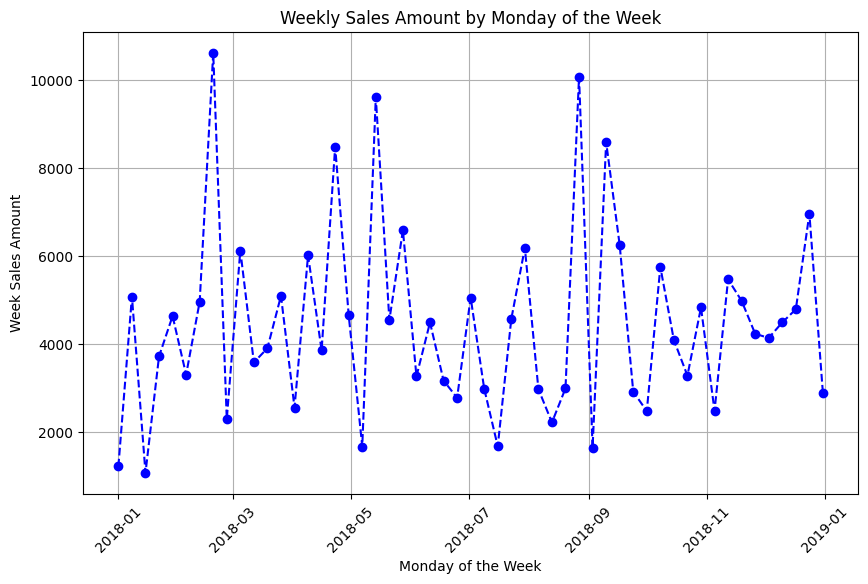

In [290]:
# case study: tong hop doanh thu theo tuan của cửa hàng, 
# dua vao plot bao cao duoc tuan nao ban hang tot, tuan nao doanh thu thap
import matplotlib.pyplot as plt

df_sample_store = (
    df_receipt[["store_cd","sales_ymd","amount"]]
    .assign(
        #chuyen dinh dang cua time
        sales_ymd = lambda df: pd.to_datetime(df['sales_ymd'], format='%Y%m%d'),
        # tinh ngay trong tuan
        day_of_week = lambda df: df['sales_ymd'].dt.weekday, 
        # Tính ngày thứ Hai trong tuần của ngày bán hàng
        monday_of_week = lambda df: df['sales_ymd'] - df["day_of_week"].apply(lambda x: pd.Timedelta(days=x)),
    )
    .groupby(["store_cd","monday_of_week"]).agg(week_sales_amount = ("amount", "sum"))
    .reset_index()
    .query("store_cd=='S12007' & monday_of_week >='2018-01-01' & monday_of_week <='2019-01-01'")
)
#plot doanh thu theo tuan/cua hang
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df_sample_store['monday_of_week'], df_sample_store['week_sales_amount'], marker='o', linestyle='--', color='b')

# Thêm tiêu đề và nhãn cho các trục
plt.title('Weekly Sales Amount by Monday of the Week')
plt.xlabel('Monday of the Week')
plt.ylabel('Week Sales Amount')
plt.xticks(rotation=45)  # Xoay nhãn trên trục x cho dễ đọc

# Hiển thị lưới
plt.grid()
#df_sample_store

---
> P-075:
Từ dữ liệu khách hàng (df_customer), lấy mẫu ngẫu nhiên 1% dữ liệu và hiển thị 10 bản ghi đầu tiên.

In [291]:

# Lấy mẫu ngẫu nhiên 1% dữ liệu
sampled_data = df_customer.sample(frac=0.01, random_state=1)

# Hiển thị 10 bản ghi đầu tiên
#result = sampled_data.head(10)

#print(result)
sampled_data.head(10)


,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
774,CS010614000086,Maki Seto,1,Male,1951-02-16,68,222-0011,"Kikuna, Kohoku -ku, Yokohama -shi, Kanagawa",S14010,2018-04-11,0-00000000-0
435,CS023414000088,Hiroko Yoneya,1,Male,1975-04-19,43,212-0016,"Minamikai -cho, Sachi -ku, Kawasaki -shi, Kana...",S14023,2016-01-01,F-20101029-F
1032,CS038315000136,Mina Koyanagi,1,Male,1983-06-12,35,134-0085,"Minami Kasai, Edogawa -ku, Tokyo",S13038,2016-01-06,9-20100917-9
683,CS005312000205,Maho Nishii,9,Unknown,1980-01-22,39,176-0002,"Sakuradai, Nerima -ku, Tokyo",S13005,2016-10-19,0-00000000-0
804,CS003712000077,Ochiai rice brewery,9,Unknown,1940-02-17,79,182-0013,"Fukudaiji Minamicho, Chofu City, Tokyo",S13003,2016-07-02,0-00000000-0
226,CS030212000015,Sachie Moriguchi,1,Male,1997-02-17,22,272-0013,"Takaya, Ichikawa City, Chiba Prefecture",S12030,2015-09-03,0-00000000-0
876,CS023403000007,Akira Morinaga,0,Female,1973-05-25,45,212-0016,"Minamikai -cho, Sachi -ku, Kawasaki -shi, Kana...",S14023,2015-02-21,0-00000000-0
81,CS031615000133,Kyoko Mizutani,1,Male,1953-05-22,65,151-0064,"Uehara, Shibuya -ku, Tokyo",S13031,2015-01-18,0-00000000-0
437,CS005412000265,Fukushi Asami,1,Male,1970-03-28,49,177-0041,"Shakujii -cho, Nerima -ku, Tokyo",S13005,2017-06-26,0-00000000-0
49,CS026615000130,Rie Matsunaga,1,Male,1951-12-19,67,251-0043,"Tsujido Motomachi, Fujisawa City, Kanagawa Pre...",S14026,2015-01-28,8-20090727-5


,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
969,CS002401000018,Kazunori Sugawara,0,Female,1977-05-22,41,189-0012,"Hagiyama -cho, Higashimurayama City, Tokyo",S13002,20150320,0-00000000-0
813,CS009314000032,Katsumushi Munako,9,Unknown,1987-03-10,32,154-0014,"Shinmachi, Setagaya -ku, Tokyo",S13009,20160206,B-20100910-B
134,CS004112000011,Miyu Tamaki,1,Male,2007-01-03,12,161-0031,"Nishimoho, Shinjuku -ku, Tokyo",S13004,20160615,0-00000000-0
539,CS018405000001,Shingo Fujimura,0,Female,1976-11-13,42,203-0041,Higashi -Kurume City Nonori,S13018,20150727,0-00000000-0
451,CS038712000003,Yu Yoshiwara,9,Unknown,1940-10-17,78,134-0083,"Tokyo, Edogawa -ku, Tokyo, Kasai",S13038,20150510,0-00000000-0
680,CS013412000077,Miki Uchimura,1,Male,1971-02-21,48,275-0017,"Fujisaki, Narashino City, Chiba Prefecture",S12013,20150418,B-20081013-7
419,CS013403000010,Kitajima Toshiaki,0,Female,1974-04-25,44,275-0021,"Sodegaura, Narashino City, Chiba Prefecture",S12013,20150731,0-00000000-0
270,CS001615000284,Nana Otsuki,1,Male,1956-07-19,62,144-0051,"Nishi -Kamata, Ota -ku, Tokyo",S13001,20170727,0-00000000-0
603,CS017713000064,Rie Nishitani,1,Male,1947-12-15,71,165-0027,"Nakano -ku, Tokyo Nomo",S13017,20150306,0-00000000-0
958,CS035602000023,Ayukiya Koyanagi,0,Female,1951-11-17,67,158-0097,"Yoga, Setagaya -ku, Tokyo",S13035,20150611,0-00000000-0


---
> P-076: Từ dữ liệu khách hàng (df_customer), trích xuất ngẫu nhiên 10% dữ liệu dựa trên tỷ lệ của mã giới tính (gender_cd) và đếm số lượng theo từng mã giới tính.

In [278]:

# Tính tỷ lệ của mỗi mã giới tính
gender_counts = df_customer['gender_cd'].value_counts(normalize=True)

# Lấy mẫu ngẫu nhiên 10% dữ liệu theo tỷ lệ của mã giới tính
sampled_data = df_customer.groupby('gender_cd', group_keys=False).apply(lambda x: x.sample(frac=0.1))

# Đếm số lượng theo từng mã giới tính
result = sampled_data['gender_cd'].value_counts()

print(result)


gender_cd
1    90
0    14
9     6
Name: count, dtype: int64


In [294]:
from sklearn.model_selection import train_test_split

# Tạo một danh sách rỗng để lưu kết quả
sampled_data = []

# Lặp qua từng mã giới tính và lấy mẫu 10% dựa trên tỷ lệ
for gender in df_customer['gender_cd'].unique():
    # Lọc dữ liệu theo mã giới tính
    gender_data = df_customer[df_customer['gender_cd'] == gender]
    
    # Sử dụng train_test_split để lấy 10% dữ liệu
    sampled_gender_data, _ = train_test_split(gender_data, test_size=0.9, random_state=1)
    
    # Thêm dữ liệu đã lấy mẫu vào danh sách
    sampled_data.append(sampled_gender_data)

# Kết hợp tất cả các mẫu lại với nhau
sampled_data = pd.concat(sampled_data)

# Đếm số lượng theo từng mã giới tính
result = sampled_data['gender_cd'].value_counts()

#print(result)
result
#sampled_data.head()


gender_cd
1    90
0    14
9     5
Name: count, dtype: int64

In [300]:
from sklearn.model_selection import train_test_split
# test_size=0.1: df_train (90%). df_test(10%)
df_train, df_test = train_test_split(df_customer, test_size=0.1, stratify=df_customer["gender_cd"])
df_test.groupby("gender_cd").agg({"customer_id":"count"})

,customer_id
gender_cd,
0,14
1,90
9,6


---
> P-077: Tính tổng số tiền bán hàng theo từng đơn vị khách hàng từ dữ liệu chi tiết hóa đơn (df_receipt) và trích xuất các giá trị ngoại lệ của tổng số tiền bán hàng. Lưu ý rằng giá trị ngoại lệ là giá trị vượt quá 3σ từ trung bình sau khi chuẩn hóa tổng số tiền bán hàng. (Có thể là số nguyên hoặc số thập phân). Hiển thị kết quả 10 mục.

In [303]:
# Bước 1: Tính tổng số tiền bán hàng theo từng khách hàng
total_sales_per_customer = df_receipt.groupby('customer_id')['amount'].sum().reset_index()

# Bước 2: Tính trung bình và độ lệch chuẩn
mean_sales = total_sales_per_customer['amount'].mean()
std_sales = total_sales_per_customer['amount'].std()

# Bước 3: Xác định ngưỡng cho giá trị ngoại lệ (mean + 3 * std)
threshold_upper = mean_sales + 3 * std_sales

# Bước 4: Trích xuất các giá trị ngoại lệ
outliers = total_sales_per_customer[total_sales_per_customer['amount'] > threshold_upper]

# Bước 5: Hiển thị kết quả 10 mục
print("Tổng số tiền bán hàng theo từng khách hàng:")
print(total_sales_per_customer.head())

print("\nGiá trị ngoại lệ:")
print(outliers.head(10))  # Hiển thị tối đa 10 mục

Tổng số tiền bán hàng theo từng khách hàng:
      customer_id  amount
0  CS001113000004    1298
1  CS001114000005     626
2  CS001115000010    3044
3  CS001205000004    1988
4  CS001205000006    3337

Giá trị ngoại lệ:
         customer_id    amount
8306  ZZ000000000000  12395003


In [306]:
# khi xay dung mo hinh machine learning thuong se phai loai bo gia tri ngoai le 3σ
from sklearn import preprocessing

df_sales_amount = df_receipt.groupby("customer_id").agg({"amount":"sum"}).reset_index()
df_sales_amount["log_sum_amount"]= np.log(df_sales_amount["amount"]+0.5)
df_sales_amount["log_sum_amount_ss"]= preprocessing.scale(df_sales_amount["log_sum_amount"]) # chuan hoa du lieu

df_sales_amount.query('abs(log_sum_amount_ss)>3').head(10)
                                                         

,customer_id,amount,log_sum_amount,log_sum_amount_ss
8306,ZZ000000000000,12395003,16.332804,7.967822


---
> P-078: Tính tổng số tiền bán hàng (amount) theo từng đơn vị khách hàng từ dữ liệu chi tiết hóa đơn (df_receipt) và trích xuất các giá trị ngoại lệ của tổng số tiền bán hàng. Lưu ý rằng, loại trừ các khách hàng có ID bắt đầu bằng 'Z' vì họ là thành viên không hợp lệ. Ngoại lệ được xác định bằng cách sử dụng IQR (khoảng tứ phân vị) và được coi là giá trị dưới "Q1 - 1.5 * IQR" hoặc vượt quá "Q3 + 1.5 * IQR". Hiển thị kết quả 10 mục.

In [316]:
# su dung IQR de loai bo gia tri ngoai lai
# tinh tong, loai bo khach hang bat dau bang chu Z
df_sales_amount =(
    df_receipt.query("not customer_id.str.startswith('Z')")
    .groupby("customer_id")
    .agg({"amount" : "sum"})
    .reset_index()
)
#tinh percentile Q1:25, Q3:75
pct25 = np.percentile(df_sales_amount["amount"], q=25)
pct75 = np.percentile(df_sales_amount["amount"], q=75)
iqr = pct75 - pct25
upper_threshold = pct75 + (1.5*iqr)
lower_threshold = pct25 - (1.5*iqr)

df_sales_amount.query("amount > @upper_threshold or amount < @lower_threshold").head(10)


#df_sales_amount.head()

,customer_id,amount
98,CS001414000048,8584
332,CS001605000009,18925
549,CS002415000594,9568
1180,CS004414000181,9584
1558,CS005415000137,8734
1733,CS006414000001,9156
1736,CS006414000029,9179
1752,CS006415000105,10042
1755,CS006415000147,12723
1757,CS006415000157,10648


,customer_id,amount
98,CS001414000048,8584
332,CS001605000009,18925
549,CS002415000594,9568
1180,CS004414000181,9584
1558,CS005415000137,8734
1733,CS006414000001,9156
1736,CS006414000029,9179
1752,CS006415000105,10042
1755,CS006415000147,12723
1757,CS006415000157,10648


---
> P-079:
Kiểm tra dữ liệu sản phẩm (df_product) và phát hiện các giá trị bị thiếu.

In [320]:
# Kiểm tra các giá trị bị thiếu trong toàn bộ DataFrame
missing_values = df_product.isnull().sum()

# Hiển thị số lượng giá trị bị thiếu theo từng cột
print("Số lượng giá trị bị thiếu theo từng cột:")
print(missing_values[missing_values > 0])

# Kiểm tra tỷ lệ phần trăm giá trị bị thiếu
missing_percentage = (missing_values / len(df_product)) * 100

# Hiển thị tỷ lệ phần trăm giá trị bị thiếu
print("\nTỷ lệ phần trăm giá trị bị thiếu theo từng cột:")
print(missing_percentage[missing_percentage > 0])


Số lượng giá trị bị thiếu theo từng cột:
unit_price    7
unit_cost     7
dtype: int64

Tỷ lệ phần trăm giá trị bị thiếu theo từng cột:
unit_price    0.069791
unit_cost     0.069791
dtype: float64


In [319]:
df_product.isnull().sum()

product_cd            0
category_major_cd     0
category_medium_cd    0
category_small_cd     0
unit_price            7
unit_cost             7
dtype: int64

product_cd            0
category_major_cd     0
category_medium_cd    0
category_small_cd     0
unit_price            7
unit_cost             7
dtype: int64

---
> P-080: Tạo dữ liệu sản phẩm mới bằng cách xóa tất cả các bản ghi có thiếu sót trong bất kỳ mục nào từ dữ liệu sản phẩm (df_product). Hiển thị số lượng trước và sau khi xóa, và xác nhận rằng số lượng đã giảm đúng như đã kiểm tra ở P-079.

Before dropna: 10030
After dropna: 10023


### Phần 5: 81 - 100

---
> P-081: Tạo dữ liệu sản phẩm mới bằng cách điền giá trị trung bình cho các mục đơn giá (unit_price) và giá vốn (unit_cost) bị thiếu. Lưu ý rằng, giá trị trung bình sẽ được làm tròn đến đơn vị yên gần nhất (có thể dùng phương pháp làm tròn lên hoặc làm tròn đến số chẵn). Sau khi thực hiện việc điền giá trị, xác nhận rằng không còn thiếu sót trong các mục này.

In [115]:
# 1

product_cd            0
category_major_cd     0
category_medium_cd    0
category_small_cd     0
unit_price            0
unit_cost             0
dtype: int64

In [116]:
# 2
from sklearn.impute import SimpleImputer

product_cd            0
category_major_cd     0
category_medium_cd    0
category_small_cd     0
unit_price            0
unit_cost             0
dtype: int64

---
> P-082: Tạo dữ liệu sản phẩm mới bằng cách điền giá trị trung vị cho các mục đơn giá (unit_price) và giá vốn (unit_cost) bị thiếu. Lưu ý rằng, giá trị trung vị sẽ được làm tròn đến đơn vị yên gần nhất (có thể dùng phương pháp làm tròn lên hoặc làm tròn đến số chẵn). Sau khi thực hiện việc điền giá trị, xác nhận rằng không còn thiếu sót trong các mục này.

np.float64(198.0)

product_cd            0
category_major_cd     0
category_medium_cd    0
category_small_cd     0
unit_price            0
unit_cost             0
dtype: int64

---
> P-083: Tạo dữ liệu sản phẩm mới bằng cách điền giá trị trung vị tính theo từng mã phân loại nhỏ của danh mục sản phẩm (category_small_cd) cho các mục đơn giá (unit_price) và giá vốn (unit_cost) bị thiếu. Lưu ý rằng, giá trị trung vị sẽ được làm tròn đến đơn vị yên gần nhất (có thể dùng phương pháp làm tròn lên hoặc làm tròn đến số chẵn). Sau khi thực hiện việc điền giá trị, xác nhận rằng không còn thiếu sót trong các mục này.

In [119]:
# 1

category_small_cd     0
median_price          0
median_cost           0
product_cd            0
category_major_cd     0
category_medium_cd    0
unit_price            0
unit_cost             0
dtype: int64

In [120]:
# 2

product_cd            0
category_major_cd     0
category_medium_cd    0
category_small_cd     0
unit_price            0
unit_cost             0
median_price          0
median_cost           0
dtype: int64

---
> P-084: Tính tỷ lệ doanh thu năm 2019 so với tổng doanh thu của toàn bộ khách hàng (df_customer) trong toàn bộ thời gian, và tạo dữ liệu mới. Trong trường hợp không có doanh thu, hãy coi như bằng 0. Sau đó, trích xuất những mục có tỷ lệ lớn hơn 0 và hiển thị kết quả 10 mục. Đồng thời, xác nhận rằng dữ liệu được tạo không có thiếu sót.

In [121]:
# 1

,customer_id,amount_2019,amount_all,amount_rate
0,CS019415000154,1862.0,5753.0,0.323657
1,CS008514000047,596.0,889.0,0.670416
4,CS033515000071,1683.0,4540.0,0.370705
8,CS020412000046,208.0,208.0,1.000000
15,CS044415000024,862.0,862.0,1.000000
16,CS024415000146,2872.0,4998.0,0.574630
45,CS019415000084,764.0,3881.0,0.196856
46,CS026513000087,459.0,1201.0,0.382182
53,CS019214000008,228.0,4481.0,0.050881
54,CS002515000256,1338.0,2296.0,0.582753


In [122]:
# 2

,customer_id,amount_2019,amount_all,amount_rate
0,CS019415000154,1862.0,5753.0,0.323657
1,CS008514000047,596.0,889.0,0.670416
4,CS033515000071,1683.0,4540.0,0.370705
8,CS020412000046,208.0,208.0,1.000000
15,CS044415000024,862.0,862.0,1.000000
16,CS024415000146,2872.0,4998.0,0.574630
45,CS019415000084,764.0,3881.0,0.196856
46,CS026513000087,459.0,1201.0,0.382182
53,CS019214000008,228.0,4481.0,0.050881
54,CS002515000256,1338.0,2296.0,0.582753


---
> P-085: Đối với toàn bộ khách hàng trong dữ liệu khách hàng (df_customer), sử dụng mã bưu điện (postal_cd) để liên kết với dữ liệu mã địa lý (df_geocode) và tạo dữ liệu khách hàng mới. Lưu ý rằng, nếu một mã bưu điện (postal_cd) có nhiều thông tin kinh độ (longitude) và vĩ độ (latitude) thì tính giá trị trung bình của kinh độ và vĩ độ để sử dụng. Hiển thị 10 mục để xác nhận kết quả đã tạo.

In [123]:
# 1

,postal_cd,m_longitude,m_lattitude,customer_id,customer_name,gender_cd,gender,birth_day,age,address,application_store_cd,application_date,status_cd
0,167-0022,139.62378,35.72037,CS005713000021,Ruria Noda,1,Male,1943-10-03,75,"Suginami -ku, Tokyo Shimoigusa",S13005,20150317,0-00000000-0
1,167-0022,139.62378,35.72037,CS004513000232,Reiko Fujishima,1,Male,1966-09-08,52,"Suginami -ku, Tokyo Shimoigusa",S13004,20161226,0-00000000-0
2,167-0022,139.62378,35.72037,CS005415000202,Nana Ishiguro,1,Male,1975-02-06,44,"Suginami -ku, Tokyo Shimoigusa",S13005,20150912,8-20100616-B
3,167-0022,139.62378,35.72037,CS004215000052,Yumiko Senoo,1,Male,1989-02-02,30,"Suginami -ku, Tokyo Shimoigusa",S13004,20150504,C-20090421-B
4,167-0022,139.62378,35.72037,CS005415000361,Miyuki Kawahara,1,Male,1972-10-28,46,"Suginami -ku, Tokyo Shimoigusa",S13005,20170502,6-20100824-9
5,167-0022,139.62378,35.72037,CS005415000557,Natsumi Uno,1,Male,1972-11-17,46,"Suginami -ku, Tokyo Shimoigusa",S13005,20170619,8-20100615-1
6,167-0022,139.62378,35.72037,CS004215000095,Yoko Arai,9,Unknown,1989-05-22,29,"Suginami -ku, Tokyo Shimoigusa",S13004,20160907,0-00000000-0
7,167-0022,139.62378,35.72037,CS005415000563,Hikaru Ishii,1,Male,1972-05-29,46,"Suginami -ku, Tokyo Shimoigusa",S13005,20170930,0-00000000-0
8,167-0022,139.62378,35.72037,CS005415000025,Rary,9,Unknown,1969-08-22,49,"Suginami -ku, Tokyo Shimoigusa",S13005,20150110,D-20100716-D
9,167-0022,139.62378,35.72037,CS004412000362,Yu Tamura,1,Male,1973-07-06,45,"Suginami -ku, Tokyo Shimoigusa",S13004,20161020,0-00000000-0


In [124]:
# 2

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd,m_longitude,m_latitude
0,CS005713000021,Ruria Noda,1,Male,1943-10-03,75,167-0022,"Suginami -ku, Tokyo Shimoigusa",S13005,20150317,0-00000000-0,139.62378,35.72037
1,CS004513000232,Reiko Fujishima,1,Male,1966-09-08,52,167-0022,"Suginami -ku, Tokyo Shimoigusa",S13004,20161226,0-00000000-0,139.62378,35.72037
2,CS003412000454,Okayama Natsuzora,1,Male,1971-04-30,47,182-0012,"Chofu -shi, Tokyo, Jindaiji Temple Higashi -cho",S13003,20171011,0-00000000-0,139.55756,35.67020
3,CS005415000202,Nana Ishiguro,1,Male,1975-02-06,44,167-0022,"Suginami -ku, Tokyo Shimoigusa",S13005,20150912,8-20100616-B,139.62378,35.72037
4,CS039612000088,Riho Ono,1,Male,1957-03-04,62,168-0065,"Hamadayama, Suginami -ku, Tokyo",S13039,20150319,0-00000000-0,139.63101,35.67802
5,CS004215000052,Yumiko Senoo,1,Male,1989-02-02,30,167-0022,"Suginami -ku, Tokyo Shimoigusa",S13004,20150504,C-20090421-B,139.62378,35.72037
6,CS019215000029,Mayuko Sawa,1,Male,1994-10-14,24,176-0002,"Sakuradai, Nerima -ku, Tokyo",S13019,20151203,A-20100622-9,139.66452,35.74001
7,CS005415000361,Miyuki Kawahara,1,Male,1972-10-28,46,167-0022,"Suginami -ku, Tokyo Shimoigusa",S13005,20170502,6-20100824-9,139.62378,35.72037
8,CS003412000488,Saki Okamoto,1,Male,1971-10-29,47,182-0012,"Chofu -shi, Tokyo, Jindaiji Temple Higashi -cho",S13003,20161201,0-00000000-0,139.55756,35.67020
9,CS005415000557,Natsumi Uno,1,Male,1972-11-17,46,167-0022,"Suginami -ku, Tokyo Shimoigusa",S13005,20170619,8-20100615-1,139.62378,35.72037


---
> P-086: Đối với dữ liệu khách hàng có tọa độ kinh độ vĩ độ được tạo tại 085, kết hợp với dữ liệu cửa hàng (df_store) bằng mã cửa hàng đăng ký thành viên (application_store_cd). Sau đó, sử dụng thông tin vĩ độ (latitude) và kinh độ (longitude) của cửa hàng đăng ký và địa chỉ của khách hàng (address) để tính khoảng cách (đơn vị: km) giữa cửa hàng đăng ký và địa chỉ của khách hàng, và hiển thị cả ID khách hàng (customer_id), địa chỉ khách hàng (address), và địa chỉ cửa hàng (address). Phương thức tính toán có thể đơn giản, nhưng cũng có thể sử dụng thư viện với phương thức có độ chính xác cao hơn. Hiển thị kết quả 10 mục.
> 
> * Công thức tính khoảng cách:
    ```
    Vĩ độ - latitude (radian): φ
    Kinh độ - longitude (radian): λ
    Khoảng cách L = 6371 * arccos(sin φ₁ * sin φ₂ + cos φ₁ * cos φ₂ * cos(λ₁ - λ₂))

In [125]:
# 1
# Hint: Cho trước công thức tính khoảng cách
def calc_distance(x1, y1, x2, y2):
    """Calculate Haversine distance 
    """
    distance = 6371 * math.acos(
        math.sin(math.radians(x1)) 
        * math.sin(math.radians(x2)) 
        + math.cos(math.radians(x1)) 
        * math.cos(math.radians(x2)) 
        * math.cos(math.radians(y1) - math.radians(y2))
    )
    return distance

,customer_id,customer_address,store_address,distance
0,CS005713000021,"Suginami -ku, Tokyo Shimoigusa","Shirasagi Sanchome, Nakano-ku, Tokyo",0.666532
1,CS004513000232,"Suginami -ku, Tokyo Shimoigusa","Saginomiya Sanchome, Nakano-ku, Tokyo",1.689601
2,CS003412000454,"Chofu -shi, Tokyo, Jindaiji Temple Higashi -cho","Komae City, Tokyo Izumi Honcho 4-chome",2.964344
3,CS005415000202,"Suginami -ku, Tokyo Shimoigusa","Shirasagi Sanchome, Nakano-ku, Tokyo",0.666532
4,CS039612000088,"Hamadayama, Suginami -ku, Tokyo","Minamiogikubo 4-chome, Suginami-ku, Tokyo",2.873890
5,CS004215000052,"Suginami -ku, Tokyo Shimoigusa","Saginomiya Sanchome, Nakano-ku, Tokyo",1.689601
6,CS019215000029,"Sakuradai, Nerima -ku, Tokyo","Komorine 1-chome, Itabashi-ku, Tokyo",1.448265
7,CS005415000361,"Suginami -ku, Tokyo Shimoigusa","Shirasagi Sanchome, Nakano-ku, Tokyo",0.666532
8,CS003412000488,"Chofu -shi, Tokyo, Jindaiji Temple Higashi -cho","Komae City, Tokyo Izumi Honcho 4-chome",2.964344
9,CS005415000557,"Suginami -ku, Tokyo Shimoigusa","Shirasagi Sanchome, Nakano-ku, Tokyo",0.666532


In [126]:
# 2
from sklearn.metrics.pairwise import haversine_distances

def calc_haversine_distance(lat1, lon1, lat2, lon2):
    # Using sklearn haversine_distances to write a function to calculate distance
    # your code is here
    # ----
    return distance[0][0] * 6371

df_tmp = (
    df_customer_1
    .merge(
        df_store, how="left", left_on="application_store_cd", right_on="store_cd"
    )
    .rename(
        columns={"address_x": "customer_address",
                 "address_y": "store_address"}
    )
    .assign(
        distance=lambda df: df[["m_latitude", "m_longitude", "latitude", "longitude"]]
                .apply(lambda x: calc_haversine_distance(x[0], x[1], x[2], x[3]), axis=1)
    )
)

df_tmp[["customer_id", "customer_address", "store_address", "distance"]].head(10)

,customer_id,customer_address,store_address,distance
0,CS005713000021,"Suginami -ku, Tokyo Shimoigusa","Shirasagi Sanchome, Nakano-ku, Tokyo",0.666532
1,CS004513000232,"Suginami -ku, Tokyo Shimoigusa","Saginomiya Sanchome, Nakano-ku, Tokyo",1.689601
2,CS003412000454,"Chofu -shi, Tokyo, Jindaiji Temple Higashi -cho","Komae City, Tokyo Izumi Honcho 4-chome",2.964344
3,CS005415000202,"Suginami -ku, Tokyo Shimoigusa","Shirasagi Sanchome, Nakano-ku, Tokyo",0.666532
4,CS039612000088,"Hamadayama, Suginami -ku, Tokyo","Minamiogikubo 4-chome, Suginami-ku, Tokyo",2.873890
5,CS004215000052,"Suginami -ku, Tokyo Shimoigusa","Saginomiya Sanchome, Nakano-ku, Tokyo",1.689601
6,CS019215000029,"Sakuradai, Nerima -ku, Tokyo","Komorine 1-chome, Itabashi-ku, Tokyo",1.448265
7,CS005415000361,"Suginami -ku, Tokyo Shimoigusa","Shirasagi Sanchome, Nakano-ku, Tokyo",0.666532
8,CS003412000488,"Chofu -shi, Tokyo, Jindaiji Temple Higashi -cho","Komae City, Tokyo Izumi Honcho 4-chome",2.964344
9,CS005415000557,"Suginami -ku, Tokyo Shimoigusa","Shirasagi Sanchome, Nakano-ku, Tokyo",0.666532


---
> P-087: Trong dữ liệu khách hàng (df_customer), có những khách hàng được đăng ký nhiều lần do đăng ký tại các cửa hàng khác nhau. Tạo dữ liệu khách hàng đã hợp nhất (name_merge_customer_data) sao cho mỗi khách hàng chỉ có một bản ghi, dựa trên tên (customer_name) và mã bưu điện (postal_cd). Tính toán số lượng bản ghi trong dữ liệu khách hàng, số lượng bản ghi trong dữ liệu khách hàng đã hợp nhất, và số lượng bản ghi trùng lặp. Lưu ý rằng, đối với cùng một khách hàng, giữ lại bản ghi có tổng doanh thu cao nhất, và nếu tổng doanh thu bằng nhau hoặc không có doanh thu, giữ lại bản ghi có số ID khách hàng (customer_id) nhỏ hơn.

df_customer_cnt: 1099 df_customer_merged_cnt: 1099 diff: 0


,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd,sum_amount
70,CS030415000034,Tamaki Nanko,1,Male,1969-01-28,50,272-0025,"Owada, Ichikawa City, Chiba Prefecture",S12030,20150501,F-20101020-F,15468.0
583,CS020415000261,Natsumi Takada,1,Male,1970-08-03,48,114-0034,"Kita -ku, Kita -ku, Tokyo",S13020,20150403,F-20101014-F,14901.0
912,CS014415000077,Mayuko Matsui,1,Male,1976-02-01,43,263-0025,"Anagawa -cho, Inage -ku, Chiba -shi, Chiba",S12014,20150923,F-20100903-F,14076.0
425,CS011415000193,Reina Aida,1,Male,1973-09-03,45,223-0064,"Shimoda -cho, Kohoku -ku, Yokohama -shi, Kanagawa",S14011,20150422,F-20100915-D,13637.0
946,CS010415000121,Mika Ogawa,1,Male,1976-06-26,42,222-0013,"Nishikigaoka, Kohoku -ku, Yokohama -shi, Kanagawa",S14010,20151001,F-20100410-E,11761.0


---
> P-088: Dựa trên dữ liệu đã tạo ở P-087, tạo dữ liệu khách hàng với ID hợp nhất được gán như sau:
> 
> - Đối với khách hàng không trùng lặp: gán ID khách hàng (customer_id).
> - Đối với khách hàng trùng lặp: gán ID khách hàng của bản ghi đã được trích xuất ở câu hỏi trước.
>
> Xác nhận sự khác biệt giữa số lượng ID khách hàng duy nhất và số lượng ID hợp nhất duy nhất.

Sự khác biệt số lượng ID: 0


---
> P-089: Để xây dựng mô hình dự đoán, hãy chia ngẫu nhiên dữ liệu của những khách hàng có doanh thu thành dữ liệu huấn luyện và dữ liệu kiểm tra với tỷ lệ 8:2.

Train data ratio:  0.8
Test data ratio:  0.2


---
> P-090: Dữ liệu chi tiết hóa đơn (df_receipt) có dữ liệu từ ngày 1 tháng 1 năm 2017 đến ngày 31 tháng 10 năm 2019. Tính tổng doanh thu (amount) hàng tháng và tạo 3 bộ dữ liệu để xây dựng mô hình chuỗi thời gian, trong đó dữ liệu huấn luyện gồm 12 tháng và dữ liệu kiểm tra gồm 6 tháng.

In [132]:
# 1
# Hint: Cho trước hàm split_data
def split_data(df, train_size, test_size, slide_window, start_point):
    """
    Chia dữ liệu thành hai tập: tập huấn luyện và tập kiểm tra dựa trên các thông số đầu vào.

    Tham số:
    df (DataFrame): DataFrame đầu vào chứa dữ liệu cần chia.
    train_size (int): Kích thước của tập huấn luyện (số lượng hàng/tháng).
    test_size (int): Kích thước của tập kiểm tra (số lượng hàng/tháng).
    slide_window (int): Kích thước cửa sổ trượt (số lượng hàng/tháng) để di chuyển điểm bắt đầu.
    start_point (int): Điểm bắt đầu cho cửa sổ trượt (số lần trượt cửa sổ).

    Trả về:
    tuple: Gồm hai DataFrame:
        - df_train (DataFrame): Tập huấn luyện.
        - df_test (DataFrame): Tập kiểm tra.

    Ví dụ:
    df_train, df_test = split_data(df, train_size=12, test_size=6, slide_window=6, start_point=0)
    """
    # Tính toán vị trí bắt đầu của tập huấn luyện dựa trên điểm bắt đầu và kích thước cửa sổ trượt
    train_start = start_point * slide_window
    # Tính toán vị trí bắt đầu của tập kiểm tra dựa trên kích thước của tập huấn luyện
    test_start = train_start + train_size
    # Trả về hai DataFrame: tập huấn luyện và tập kiểm tra
    return df[train_start:test_start], df[test_start:test_start + test_size]

# Your code is below
# HERE ---

,sales_ym,amount
0,201701,902056
1,201702,764413
2,201703,962945
3,201704,847566
4,201705,884010
5,201706,894242
6,201707,959205
7,201708,954836
8,201709,902037
9,201710,905739


,sales_ym,amount
12,201801,944509
13,201802,864128
14,201803,946588
15,201804,937099
16,201805,1004438
17,201806,1012329


In [135]:
print(df_train_1.shape)
print(df_test_1.shape)

(12, 2)
(6, 2)


In [136]:
# 2
# Sử dụng TimeSeriesSplit từ thư viện sklearn
from sklearn.model_selection import TimeSeriesSplit


print(len(df_train_1), ",",len(df_test_1))
print(len(df_train_2), ",",len(df_test_2))
print(len(df_train_3), ",",len(df_test_3))

12 , 6
12 , 6
12 , 6


---
> P-091: Đối với mỗi khách hàng trong dữ liệu khách hàng (df_customer), trích xuất dữ liệu bằng phương pháp giảm mẫu (undersampling) sao cho số lượng khách hàng có doanh thu và số lượng khách hàng không có doanh thu đạt tỷ lệ 1:1.

In [137]:
# Sử dụng RandomUnderSampler từ thư viện imblearn
from imblearn.under_sampling import RandomUnderSampler


Before undersampling:
is_buy_flag
0    679
1    420
Name: count, dtype: int64
---
After undersampling:
0: 420
1: 420


---
> P-092: Chuẩn hóa dữ liệu về giới tính trong dữ liệu khách hàng (df_customer) theo dạng chuẩn hóa bậc ba (3NF).

,gender_cd,gender
0,9,Unknown
1,1,Male
5,0,Female


---
> P-093: Trong dữ liệu sản phẩm (df_product), chỉ có các giá trị mã của từng danh mục mà không có tên danh mục. Kết hợp với dữ liệu danh mục (df_category) để tạo dữ liệu sản phẩm mới đã được phi chuẩn hóa, có chứa tên danh mục.

,category_small_cd,category_major_name,category_medium_name,category_small_name,product_cd,category_major_cd,category_medium_cd,unit_price,unit_cost
0,040101,Side dish,Rice,Lunch,P040101001,04,0401,198.0,149.0
1,040101,Side dish,Rice,Lunch,P040101002,04,0401,218.0,164.0
2,040101,Side dish,Rice,Lunch,P040101003,04,0401,230.0,173.0
3,040101,Side dish,Rice,Lunch,P040101004,04,0401,248.0,186.0
4,040101,Side dish,Rice,Lunch,P040101005,04,0401,268.0,201.0


---

> P-094: Xuất dữ liệu sản phẩm có tên danh mục được tạo tại 093 dưới các đặc điểm sau vào file.

| Định dạng file | Có tiêu đề hay không | Mã hóa ký tự |
|----------------|----------------------|--------------|
| CSV (phân tách bằng dấu phẩy) | Có | UTF-8 |

* Đường dẫn đến thư mục xuất file phải là như sau:
```bash
../../data/export_from_exercises
```

---
> P-095: Xuất dữ liệu sản phẩm có tên danh mục được tạo tại 093 dưới các đặc điểm sau vào file.

| Định dạng file | Có tiêu đề hay không | Mã hóa ký tự |
|----------------|----------------------|--------------|
| CSV (phân tách bằng dấu phẩy) | Có | CP932 |

* Đường dẫn đến thư mục xuất file phải là như sau:
```bash
../../data/export_from_exercises
```

---
> P-096: Xuất dữ liệu sản phẩm có tên danh mục được tạo tại 093 dưới các đặc điểm sau vào file.

| Định dạng file | Có tiêu đề hay không | Mã hóa ký tự |
|----------------|----------------------|--------------|
| CSV (phân tách bằng dấu phẩy) | Không | UTF-8 |

* Đường dẫn đến thư mục xuất file phải là như sau:
```bash
../../data/export_from_exercises
```

---
P-097: Đọc file dưới đây được tạo tại 094, hiển thị và kiểm tra xem 3 mục dữ liệu có được đọc chính xác hay không.

| Định dạng file | Có tiêu đề hay không | Mã hóa ký tự |
|----------------|----------------------|--------------|
| CSV (phân tách bằng dấu phẩy) | Có | UTF-8 |

,category_small_cd,category_major_name,category_medium_name,category_small_name,product_cd,category_major_cd,category_medium_cd,unit_price,unit_cost
0,040101,Side dish,Rice,Lunch,P040101001,04,0401,198.0,149.0
1,040101,Side dish,Rice,Lunch,P040101002,04,0401,218.0,164.0
2,040101,Side dish,Rice,Lunch,P040101003,04,0401,230.0,173.0


---
P-098: Đọc file dưới đây được tạo tại 096, hiển thị và kiểm tra xem 3 mục dữ liệu có được đọc chính xác hay không.

| Định dạng file | Có tiêu đề hay không | Mã hóa ký tự |
|----------------|----------------------|--------------|
| CSV (phân tách bằng dấu phẩy) | Không | UTF-8 |

,0,1,2,3,4,5,6,7,8
0,40101,Side dish,Rice,Lunch,P040101001,4,401,198.0,149.0
1,40101,Side dish,Rice,Lunch,P040101002,4,401,218.0,164.0
2,40101,Side dish,Rice,Lunch,P040101003,4,401,230.0,173.0


,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,category_major_name,category_medium_name,category_small_name
0,40101,Side dish,Rice,Lunch,P040101001,4,401,198.0,149.0
1,40101,Side dish,Rice,Lunch,P040101002,4,401,218.0,164.0
2,40101,Side dish,Rice,Lunch,P040101003,4,401,230.0,173.0


---
P-099: Xuất dữ liệu sản phẩm có tên danh mục được tạo tại 093 dưới các đặc điểm sau vào file.

| Định dạng file | Có tiêu đề hay không | Mã hóa ký tự |
|----------------|----------------------|--------------|
| TSV (phân tách bằng tab) | Có | UTF-8 |

* Đường dẫn đến thư mục xuất file phải là như sau:
```bash
../../data/export_from_exercises
```

---
P-100: Đọc file dưới đây được tạo tại 099, hiển thị và kiểm tra xem 3 mục dữ liệu có được đọc chính xác hay không.

| Định dạng file | Có tiêu đề hay không | Mã hóa ký tự |
|----------------|----------------------|--------------|
| TSV (phân tách bằng tab) | Có | UTF-8 |

In [147]:
# 1 Sử dụng pd.read_table()

,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,category_major_name,category_medium_name,category_small_name
0,40101,Side dish,Rice,Lunch,P040101001,4,401,198.0,149.0
1,40101,Side dish,Rice,Lunch,P040101002,4,401,218.0,164.0
2,40101,Side dish,Rice,Lunch,P040101003,4,401,230.0,173.0


In [148]:
# 2 Sử dụng pd.read_csv()


,product_cd,category_major_cd,category_medium_cd,category_small_cd,unit_price,unit_cost,category_major_name,category_medium_name,category_small_name
0,40101,Side dish,Rice,Lunch,P040101001,4,401,198.0,149.0
1,40101,Side dish,Rice,Lunch,P040101002,4,401,218.0,164.0
2,40101,Side dish,Rice,Lunch,P040101003,4,401,230.0,173.0


## Lời kết
* **Chúc mừng bạn đã hoàn thành 100 bài tập về Pandas. Bây giờ bạn hoàn toàn có thể tự tin vào khả năng sử dụng pandas cho công việc phân tích dữ liệu của bạn !**